In [1]:
import numpy as np 
import pandas as pd
# 시각화 package
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree   

In [2]:
mobile_price_1 = pd.read_csv('mobile_price_1.csv')
mobile_price_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
mobile_price_1.shape

(2000, 21)

In [4]:
mobile_price_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


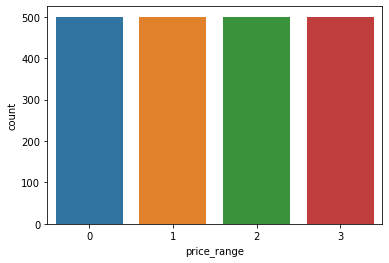

In [5]:
sns.countplot(mobile_price_1['price_range'])
plt.savefig('./price_range.png', bbox_inches="tight")

In [6]:
mobile_price_1.replace({'price_range': {1: 0, 2: 3}}, inplace=True)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

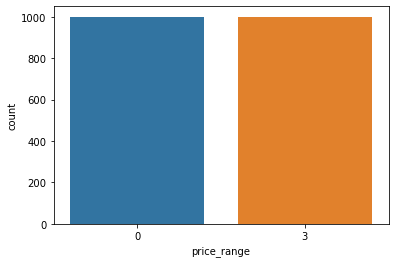

In [7]:
sns.countplot(mobile_price_1['price_range'])

In [8]:
mobile_price_1.replace({'price_range': {3: 1}}, inplace=True)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

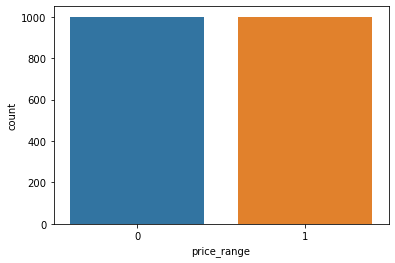

In [9]:
sns.countplot(mobile_price_1['price_range'])

<AxesSubplot:>

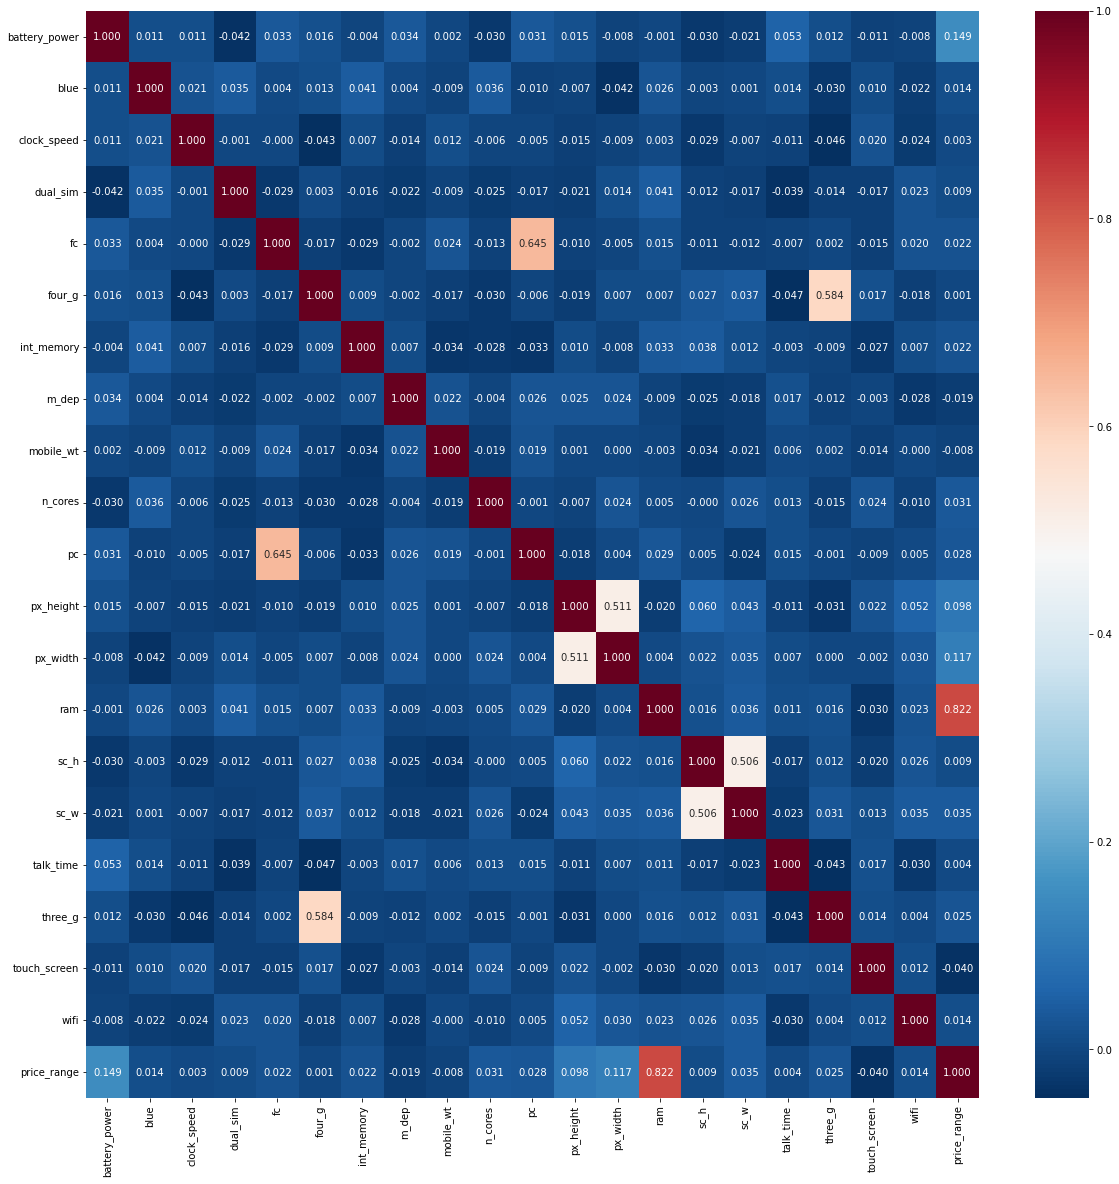

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(mobile_price_1.corr(), annot = True, fmt = '.3f', cmap = 'RdBu_r')

In [10]:
mobile_price_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [18]:
mobile_price_2 = pd.read_csv('mobile_price_2.csv')
mobile_price_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

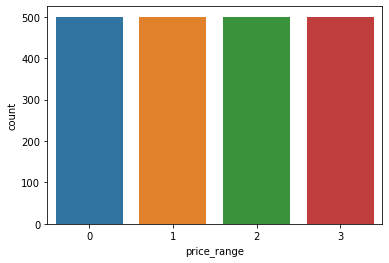

In [21]:
sns.countplot(mobile_price_2['price_range'])
# plt.savefig('./price_range.png', bbox_inches="tight")

In [31]:
index = mobile_price_2[(mobile_price_2['price_range'] == 1)].index

In [32]:
mobile_price_2.drop(index , inplace=True)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

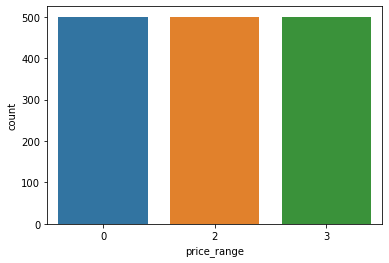

In [34]:
sns.countplot(mobile_price_2['price_range'])

In [35]:
mobile_price_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [36]:
index1 = mobile_price_2[(mobile_price_2['price_range'] == 2)].index
mobile_price_2.drop(index1 , inplace=True)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

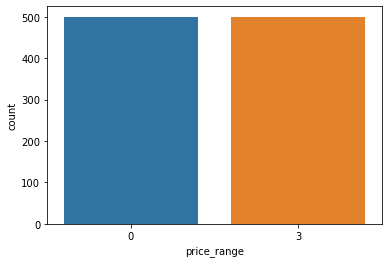

In [37]:
sns.countplot(mobile_price_2['price_range'])

In [38]:
mobile_price_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,3
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [43]:
mobile_price_2.replace({'price_range': { 3 : 1}}, inplace=True)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='count'>

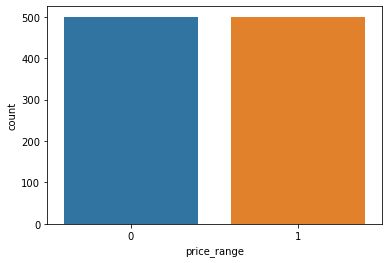

In [44]:
sns.countplot(mobile_price_2['price_range'])

In [45]:
mobile_price_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,1
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


<AxesSubplot:>

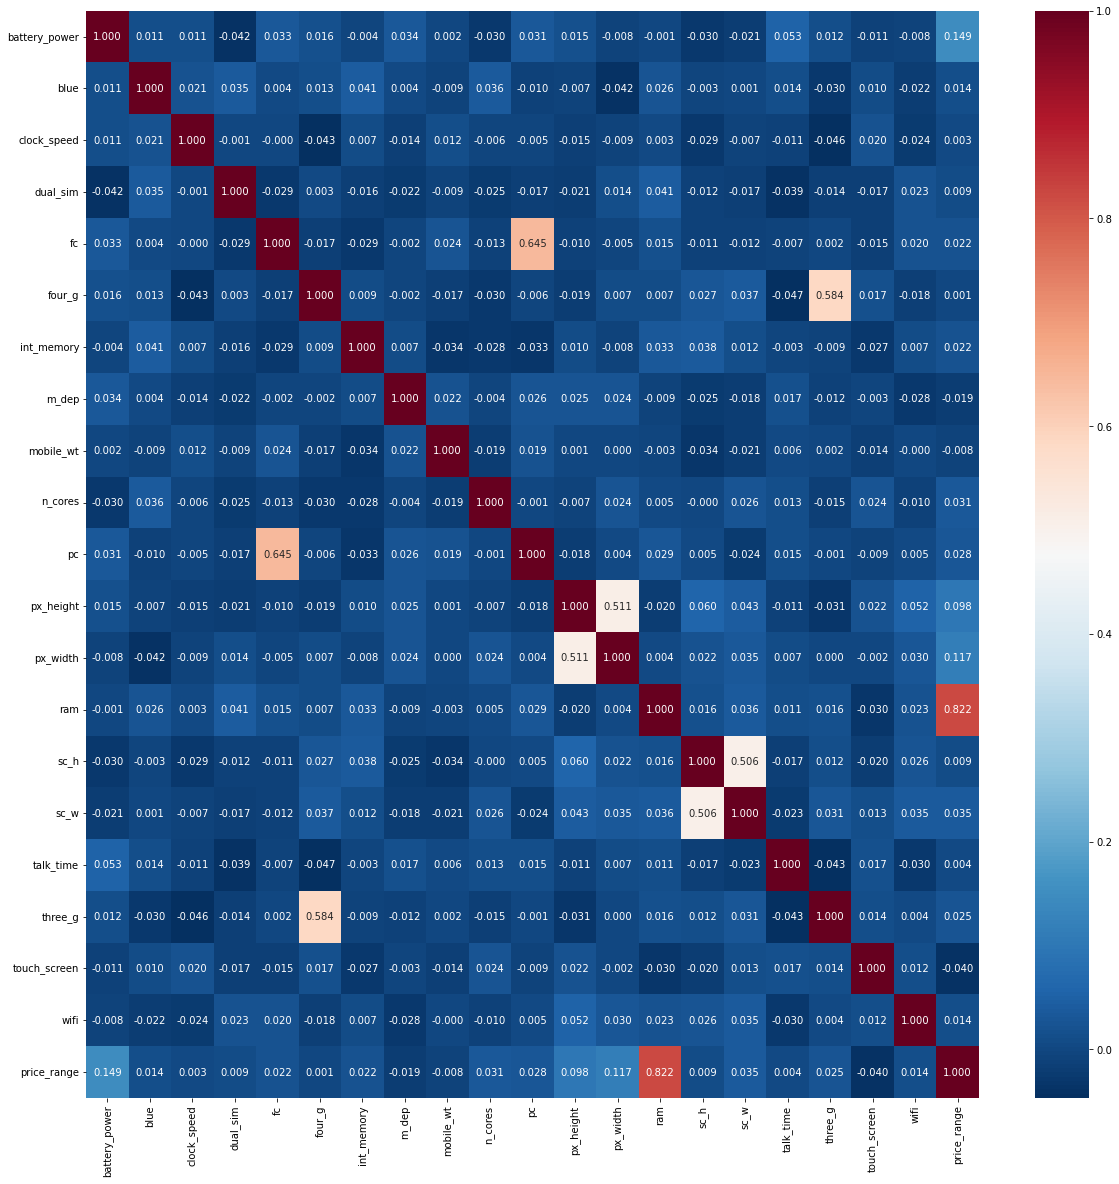

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(mobile_price_1.corr(), annot = True, fmt = '.3f', cmap = 'RdBu_r')

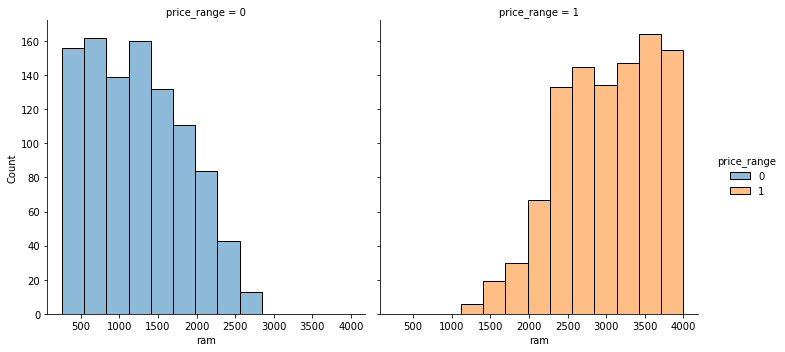

In [11]:
sns.displot(data=mobile_price_1, x="ram", hue="price_range", col="price_range")
plt.show()

<AxesSubplot:xlabel='ram', ylabel='Density'>

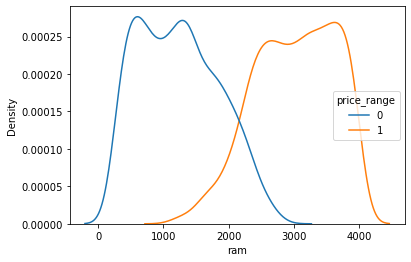

In [12]:
sns.kdeplot(data=mobile_price_1, x='ram', hue='price_range')

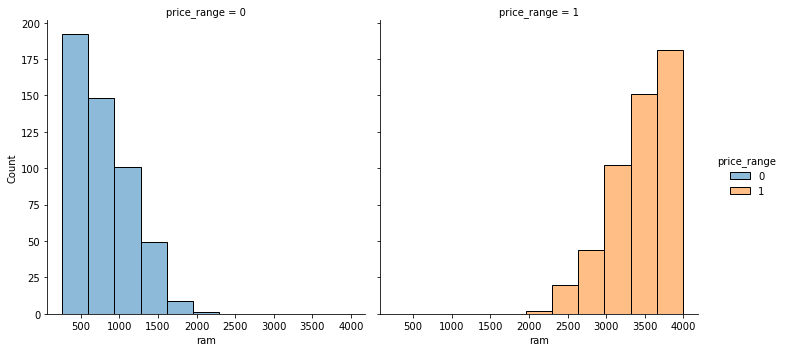

In [59]:
sns.displot(data=mobile_price_2, x="ram", hue="price_range", col="price_range")
plt.show()

<AxesSubplot:xlabel='ram', ylabel='Density'>

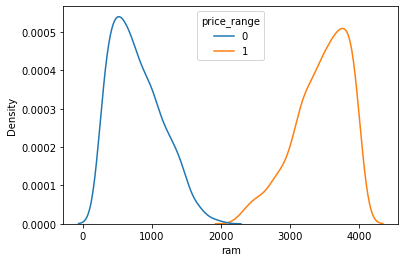

In [58]:
sns.kdeplot(data=mobile_price_2, x='ram', hue='price_range')

# Coverage-Homogeneity plot

In [86]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

In [87]:
target_name = 'price_range'

In [88]:
num_col = mobile_price_1.drop(columns=target_name).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = mobile_price_1.drop(columns=target_name).select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
categorical: []


In [89]:
num_col = mobile_price_2.drop(columns=target_name).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = mobile_price_2.drop(columns=target_name).select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

NameError: name 'mobile_price_2' is not defined

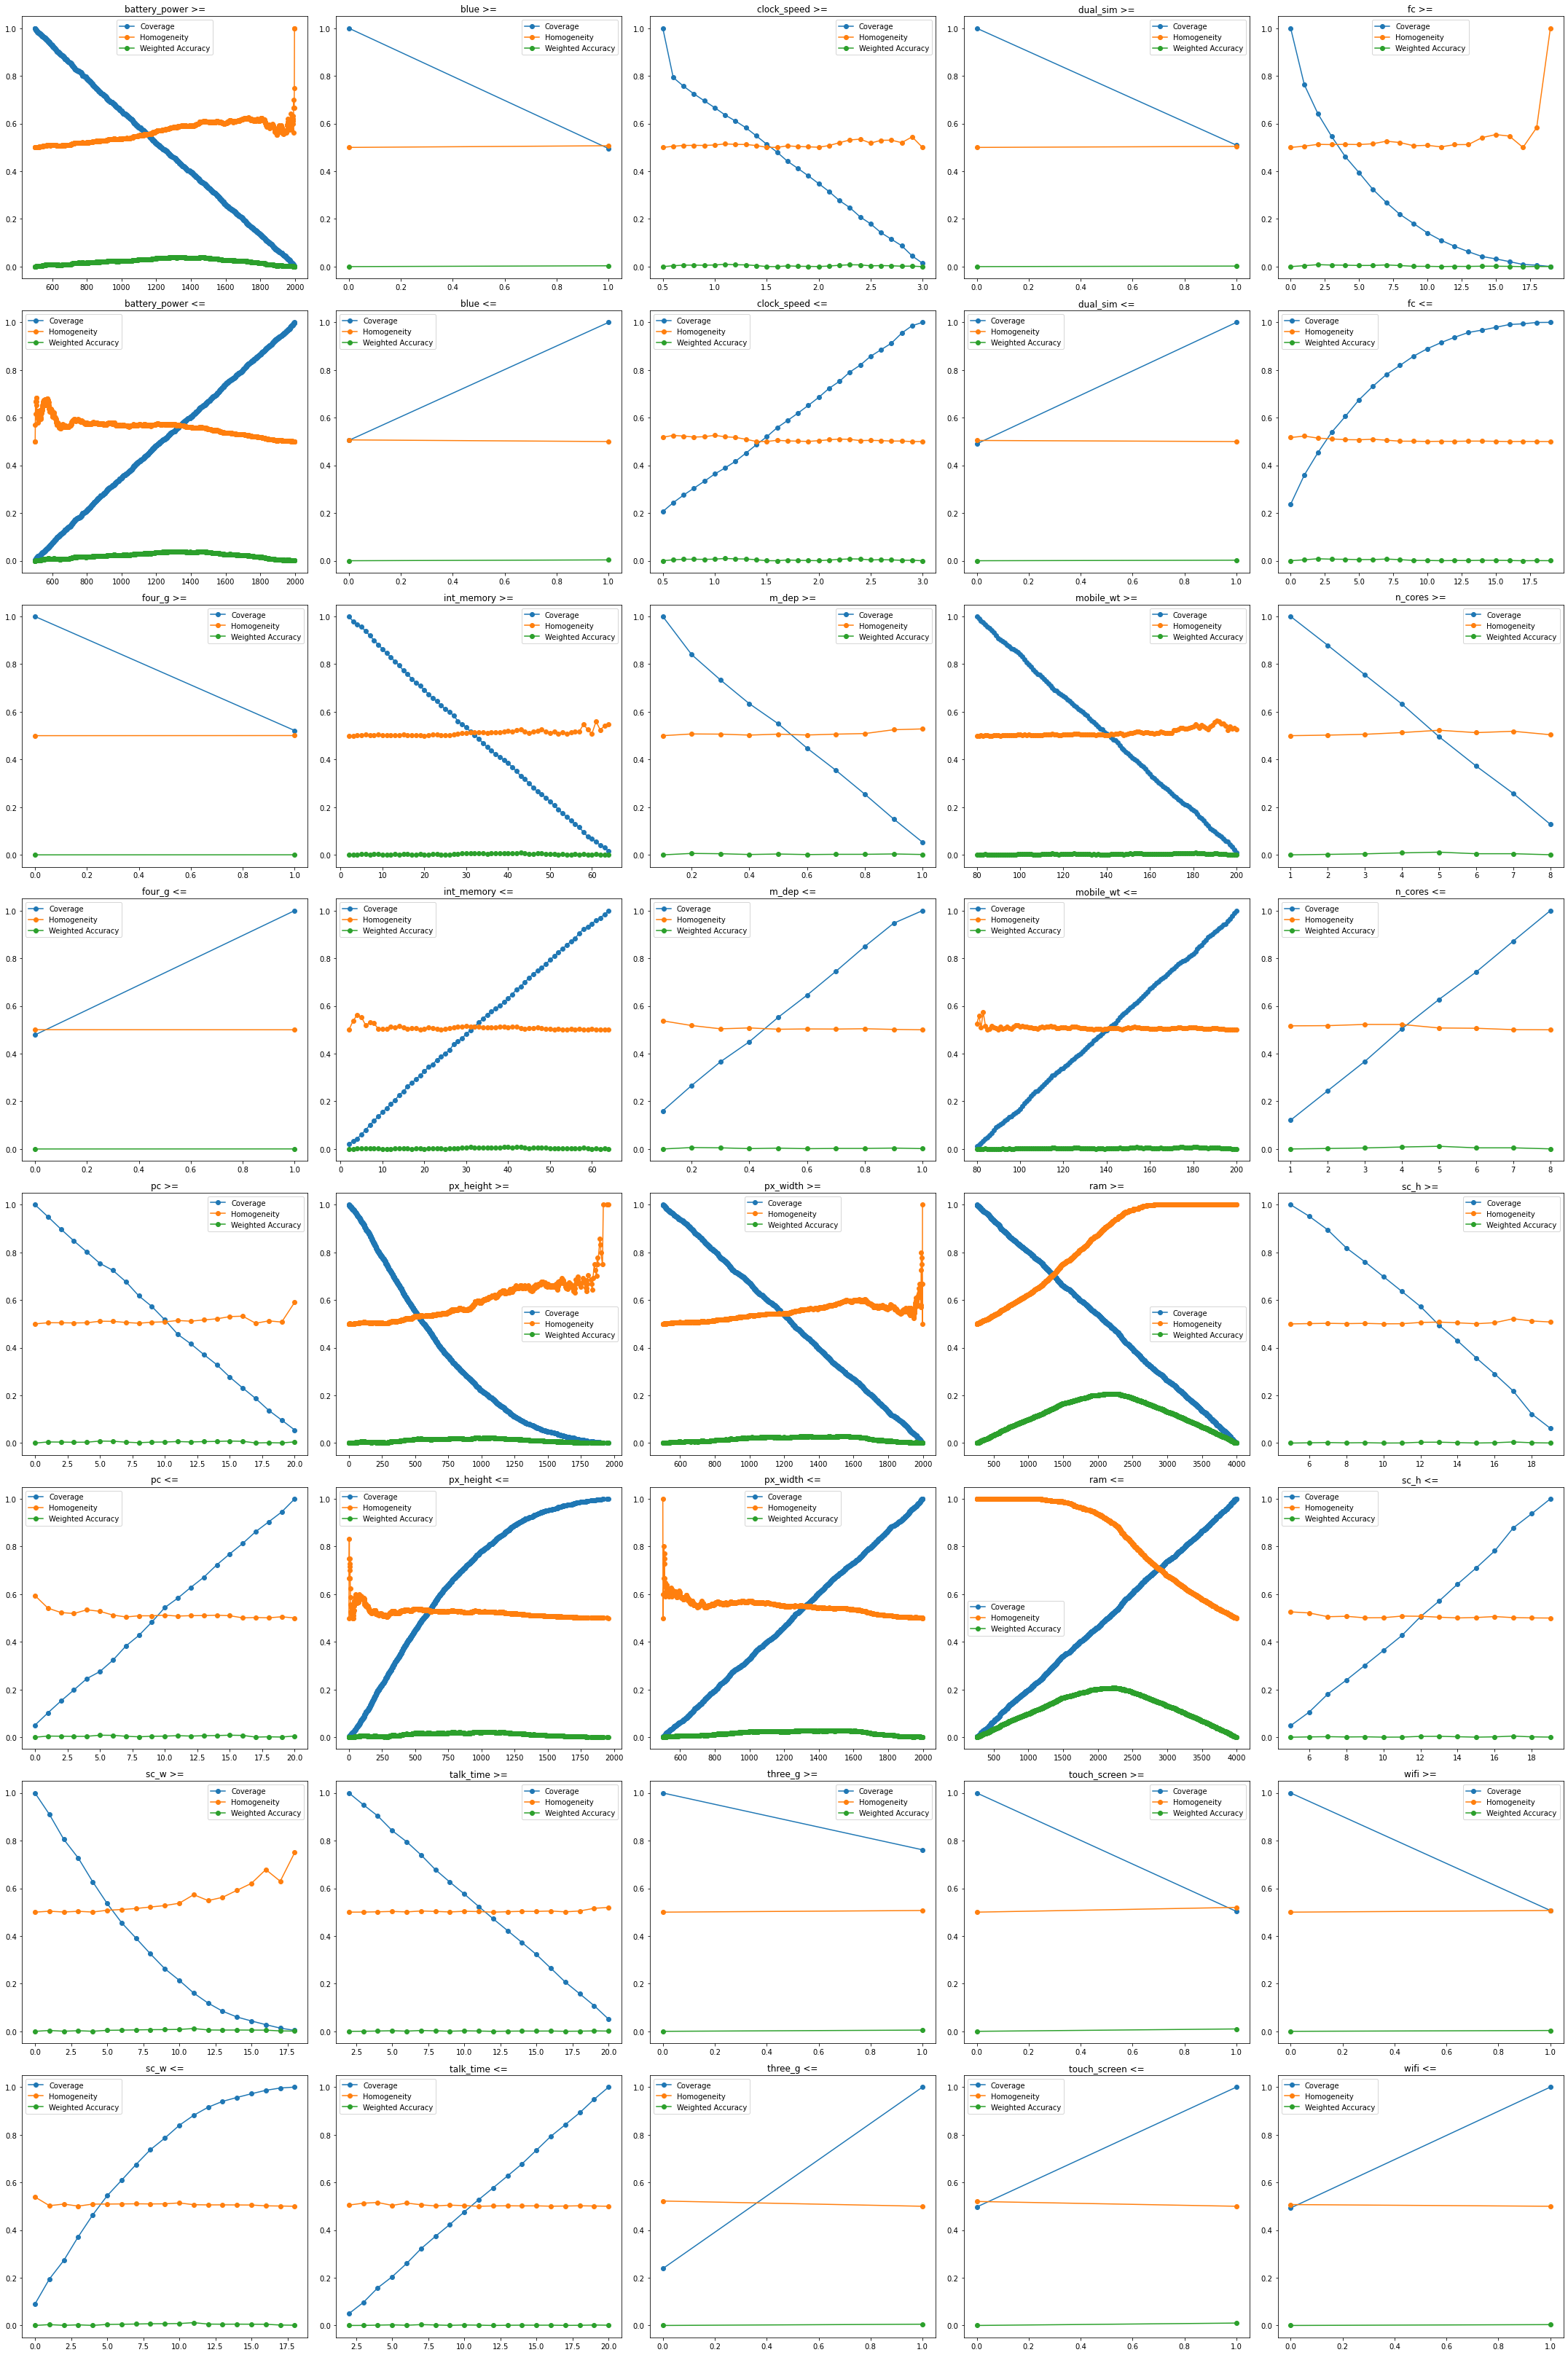

In [90]:
ncols = 5
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

pr = []
a = 1000 / 2000
pr.append(a)

pr_np = np.array(pr)


plt.figure(figsize=(30, 45)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(mobile_price_1, target_name, col, '>=')
    
    cover_np = np.array(cover)
    homo_np = np.array(homo)
    wa = cover_np * (homo_np - pr_np)
    
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.plot(cut_points, wa, '-o')
    
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(mobile_price_1, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.plot(cut_points, wa, '-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

     
    
# plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True, bbox_inches="tight") # save.figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()

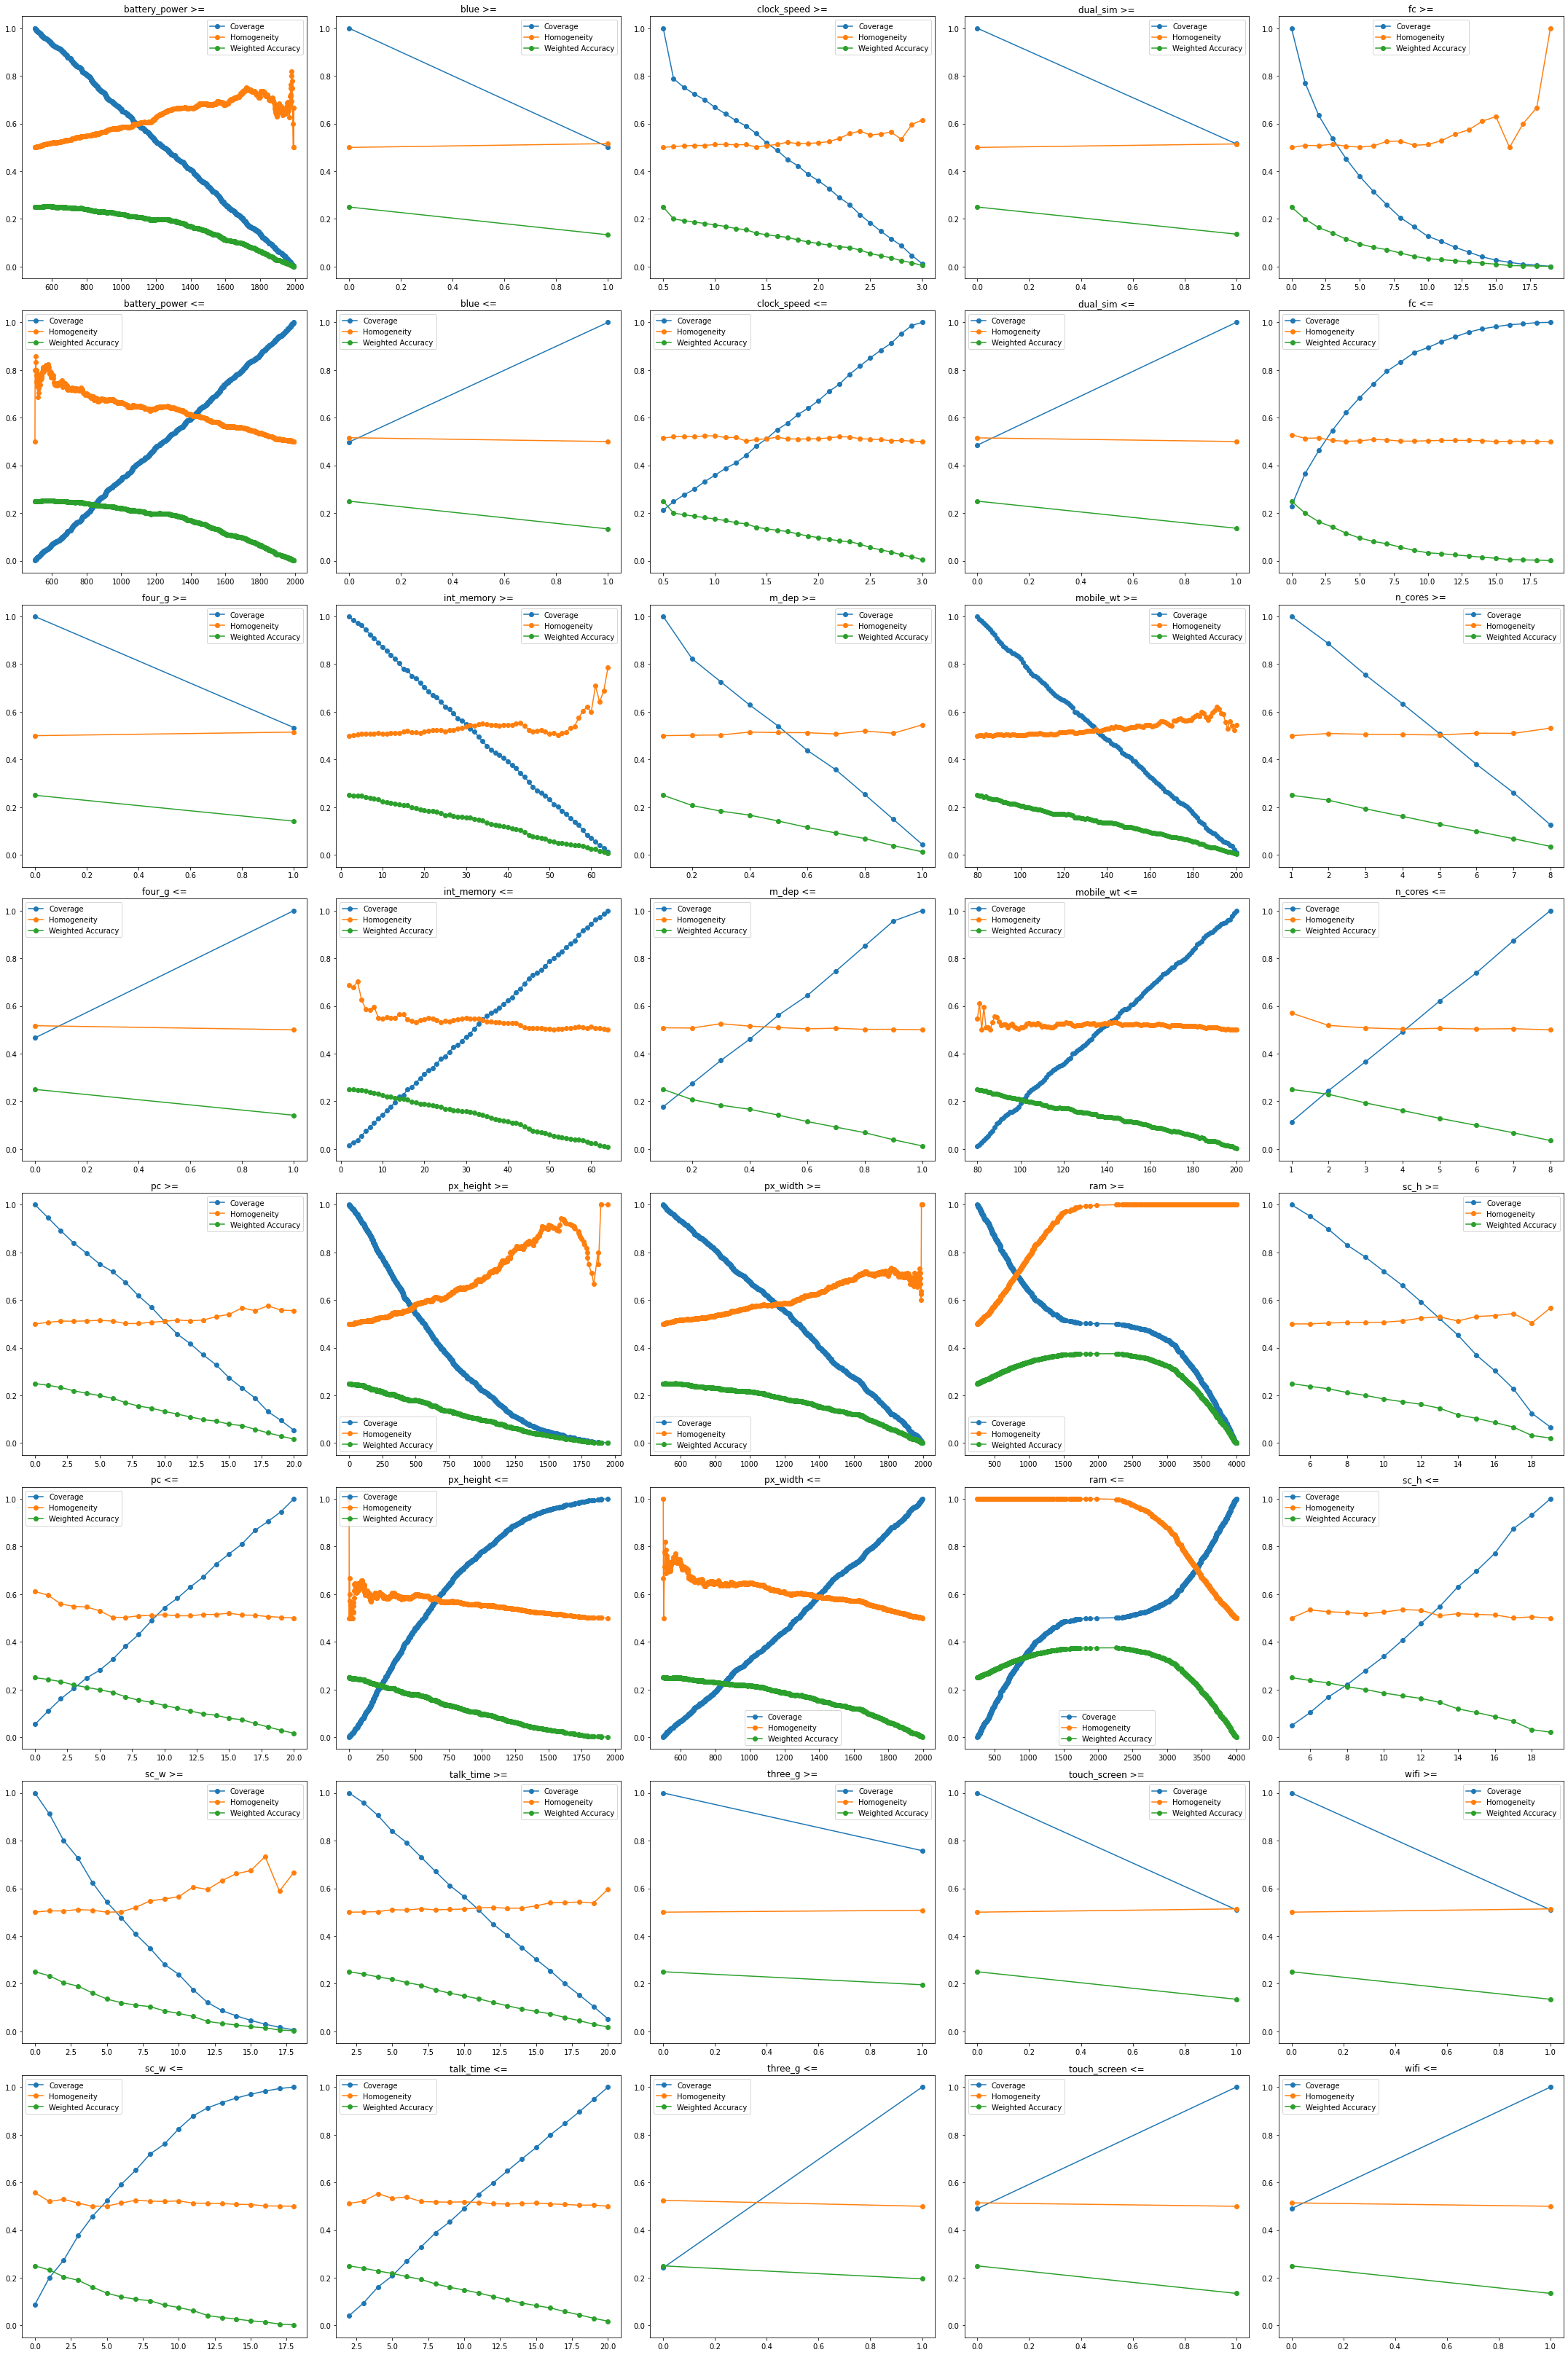

In [76]:
ncols = 5
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

pr = []
a = 500 / 2000
pr.append(a)

pr_np = np.array(pr)


plt.figure(figsize=(30, 45)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(mobile_price_2, target_name, col, '>=')
    
    cover_np = np.array(cover)
    homo_np = np.array(homo)
    wa = cover_np * (homo_np - pr_np)
    
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.plot(cut_points, wa, '-o')
    
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(mobile_price_2, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.plot(cut_points, wa, '-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity', 'Weighted Accuracy'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

     
    
# plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True, bbox_inches="tight") # save.figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()

# Decision tree

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [12]:
X=mobile_price_1.drop('price_range',axis=1)  
Y=mobile_price_1['price_range']

# train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1333)

In [14]:
model1 = tree.DecisionTreeClassifier()
model1.fit(x_train,y_train)
# prediction
y_pred_dt=model1.predict(x_test)
y_pred_dt

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

Text(83.40000000000006, 0.5, 'Predicted values')

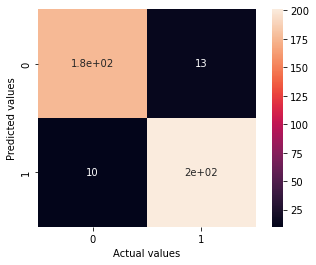

In [15]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_dt=confusion_matrix(y_test,y_pred_dt)

#confusion matrix plot
plot=sns.heatmap(confusion_dt,square=True,annot=True)
class_lables=['0','1','2','3']
plot.set_xlabel('Actual values')
plot.set_ylabel('Predicted values')

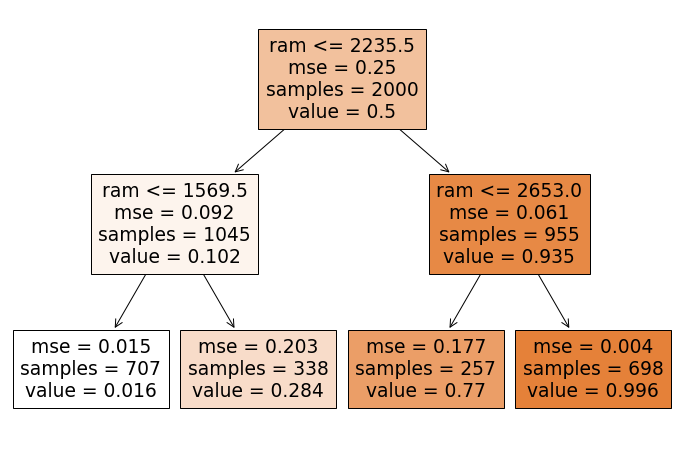

In [16]:
reg_tree = DecisionTreeRegressor(max_depth=2)
reg_tree.fit(X,Y)

plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=X.columns.tolist(), filled=True)
plt.show()

# Stable DT

In [14]:
!pip install graphviz

  Using cached graphviz-0.20-py3-none-any.whl (46 kB)


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공

In [12]:
mobile_price_1.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
X=mobile_price_1.drop('price_range',axis=1)  
Y=mobile_price_1['price_range']

from sklearn.model_selection import train_test_split
# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1333)

In [14]:
print('X_train.shape : ', X_train.shape)
print('y_train.shape : ', y_train.shape)
print('X_test.shape : ', X_test.shape)
print('y_test.shape : ', y_test.shape)

X_train.shape :  (1600, 20)
y_train.shape :  (1600,)
X_test.shape :  (400, 20)
y_test.shape :  (400,)


In [15]:
min_sample_ratio = 0.03 # 최소 샘플 수로 dataset의 샘플 수의 3%
#max_depth = 4
# min_sample = 50
impurity_measure='entropy'
iter_num=30

clf = stableDecisionTree(
    min_sample = min_sample_ratio*len(X), 
    iter_num = iter_num,
    impurity_measure = impurity_measure)
clf.fit(X_train,y_train)

In [16]:
# predictive performance

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
acc, f1

(0.91, 0.9166666666666667)

In [72]:
# predictive performance

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
acc, f1

(0.905, 0.9136363636363637)

In [20]:
# predictive performance
# min_sample 설정 안함
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
acc, f1

(0.92, 0.9241706161137441)

In [17]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[166  23]
 [ 13 198]]


In [22]:
# exporting rules to text
clf.export_text()

IF ram > 2253.0 AND ram > 2811.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power > 1048.0 AND px_width > 887.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power > 1048.0 AND px_width <= 887.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power <= 1048.0 AND px_height > 522.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 AND px_width > 714.0 AND ram > 1913.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 AND px_width > 714.0 AND ram <= 1913.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_height > 1180.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power <= 1048.0 AND px_height <= 522.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 AND px_width <= 714.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_height <= 1180.0 AND ram > 2129.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <

In [74]:
# exporting rules to text
clf.export_text()

IF ram > 2253.0 AND ram > 2811.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power > 1048.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power <= 1048.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_height > 1180.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_height <= 1180.0 AND ram > 2129.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_height <= 1180.0 AND ram <= 2129.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height > 1194.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height <= 1194.0 THEN y = 0


In [18]:
# exporting rules to text
clf.export_text()

IF ram > 2253.0 AND ram > 2811.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power > 1081.5 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power <= 1081.5 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_width > 1256.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_width <= 1256.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height > 1161.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height <= 1161.0 THEN y = 0


In [ ]:
IF ram > 2253.0 AND ram > 2811.0 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power > 1081.5 THEN y = 1
IF ram > 2253.0 AND ram <= 2811.0 AND battery_power <= 1081.5 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power > 1469.0 THEN y = 1
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_width > 1256.0 THEN y = 0
IF ram <= 2253.0 AND ram > 1568.0 AND battery_power <= 1469.0 AND px_width <= 1256.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height > 1161.0 THEN y = 0
IF ram <= 2253.0 AND ram <= 1568.0 AND px_height <= 1161.0 THEN y = 0

In [82]:
# images
visualize_tree(clf.root)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

# Stable CRI

In [13]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = mobile_price_1.copy()
target_name = 'price_range' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [20]:
min_sample_ratio = 0.01
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 100 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [21]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\Users\JI-HYEON\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.96, 0.96)

In [22]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)


[[196  10]
 [  6 188]]


In [23]:
# rules
cri.export_text()

IF ['ram >= 2630.5'] THEN price_range = 1   (homogeneity = 0.9965 , coverage = 0.3588 )
IF ['ram < 1184.5'] THEN price_range = 0   (homogeneity = 1.0 , coverage = 0.2488 )
IF ['ram < 1508.5'] THEN price_range = 0   (homogeneity = 0.9854 , coverage = 0.3425 )
IF ['ram >= 2459.5'] THEN price_range = 1   (homogeneity = 0.9817 , coverage = 0.41 )
IF ['ram < 2630.5', 'px_width < 670.5'] THEN price_range = 0   (homogeneity = 0.9192 , coverage = 0.0619 )
IF ['ram < 2630.5', 'px_height < 144.5'] THEN price_range = 0   (homogeneity = 0.8868 , coverage = 0.0662 )
IF ['ram < 2630.5', 'battery_power < 617.5'] THEN price_range = 0   (homogeneity = 0.9111 , coverage = 0.0562 )
IF ['ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'px_height >= 1545.5'] THEN price_range = 1   (homogeneity = 0.8947 , coverage = 0.0119 )
IF ['ram < 1650.0'] THEN price_range = 0   (homogeneity = 0.9717 , coverage = 0.375 )
IF ['ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'px_height >= 1251.5'] THEN price_range = 1 

In [24]:
cri.df_concise_rule

,0,1,2,3,4,5,6,7,8,9,10
Rule,ram < 1184.5,ram >= 2630.5,ram < 1508.5,ram >= 2459.5,ram < 1650.0,"ram < 2630.5, px_width < 670.5","ram < 2630.5, battery_power < 617.5","ram < 2630.5, ram >= 1184.5, ram >= 1508.5, ra...","ram < 2630.5, ram >= 1184.5, ram >= 1508.5, px...","ram < 2630.5, px_height < 144.5","ram < 2630.5, ram >= 1184.5, ram >= 1508.5, px..."
pred_y,0,1,0,1,0,0,0,1,1,0,1
Homogeneity,1.0,0.9965,0.9854,0.9817,0.9717,0.9192,0.9111,0.9,0.8947,0.8868,0.8545
Coverage,0.2488,0.3588,0.3425,0.41,0.375,0.0619,0.0562,0.0375,0.0119,0.0662,0.0344
# of condition,1.0,1.0,1.0,1.0,1.0,2.0,2.0,10.0,4.0,2.0,4.0


In [25]:
# dataset not included in rules
cri.others_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1912,695,0,1.2,0,1,1,41,0.4,169,8,...,789,1211,2282,5,2,17,1,1,0,0
341,811,1,2.4,1,5,1,2,0.3,106,6,...,333,1429,2111,18,7,2,1,0,1,0
813,721,1,1.3,1,10,0,16,0.9,125,1,...,408,1862,1713,10,3,4,0,1,1,0
458,664,0,1.2,1,0,0,28,0.9,106,5,...,754,1497,2042,17,15,19,1,1,0,0
686,1527,0,2.7,0,10,1,60,0.1,154,5,...,526,1116,2078,5,3,11,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,1579,1,1.5,0,0,0,27,0.2,142,6,...,831,1484,1713,16,4,10,1,1,1,0
1561,1076,0,2.3,1,0,1,14,0.7,191,5,...,1088,1718,2355,17,16,2,1,1,1,1
669,723,0,0.5,0,0,1,3,0.2,168,4,...,920,1748,1851,15,3,16,1,0,0,0
1633,1469,0,1.7,1,11,1,44,0.5,169,2,...,484,711,1687,15,5,5,1,1,1,0


# Y = 1 독립 종속

In [ ]:
ram >= 2630.5
ram >= 2459.5
ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'ram < 2459.5', 'px_width >= 670.5',
    'px_height >= 144.5', 'battery_power >= 617.5', 'px_height < 1545.5', 'ram >= 1650.0', 'battery_power >= 1622.0'
ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'px_height >= 1545.5

In [51]:
is_rule1 = (mobile_price_1['ram'] >= 2630.5)
rule1 = mobile_price_1[is_rule1]
rule1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,1
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,1
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1


In [27]:
is_rule2 = (mobile_price_1['ram'] >= 2459.5)
rule2 = mobile_price_1[is_rule2]
rule2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,1
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1


In [32]:
is_rule3_1 = (mobile_price_1['ram'] < 2630.5)
is_rule3_2 = (mobile_price_1['ram'] >= 1184.5)
is_rule3_3 = (mobile_price_1['ram'] >= 1508.5)
is_rule3_4 = (mobile_price_1['ram'] < 2459.5)
is_rule3_5 = (mobile_price_1['px_width'] >= 670.5)
is_rule3_6 = (mobile_price_1['px_height'] >= 144.5)
is_rule3_7 = (mobile_price_1['battery_power'] >= 617.5)
is_rule3_8 = (mobile_price_1['px_height'] < 1545.5)
is_rule3_9 = (mobile_price_1['ram'] >= 1650.0)
is_rule3_10 = (mobile_price_1['battery_power'] >= 1622.0)
# ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'ram < 2459.5', 'px_width >= 670.5',
#     'px_height >= 144.5', 'battery_power >= 617.5', 'px_height < 1545.5', 'ram >= 1650.0', 'battery_power >= 1622.0'
# is_rule3 = is_rule3_1 & is_rule3_2 & is_rule3_3 & is_rule3_4 & is_rule3_5 & is_rule3_6 & is_rule3_7 
#             & is_rule3_8 & is_rule3_9 & is_rule3_10 
rule3 = mobile_price_1[is_rule3_1 & is_rule3_2 & is_rule3_3 & is_rule3_4 & is_rule3_5 & is_rule3_6 & is_rule3_7 & 
                       is_rule3_8 & is_rule3_9 & is_rule3_10 ]
rule3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
51,1760,0,1.4,1,5,0,63,0.8,127,8,...,1382,1383,2053,19,12,16,0,1,0,1
58,1757,0,0.5,0,8,0,49,0.5,180,6,...,265,713,2056,7,5,4,0,0,0,0
63,1720,0,2.0,0,15,1,55,0.5,168,2,...,753,1353,2148,14,2,5,1,1,1,1
91,1977,1,2.0,1,7,1,54,1.0,171,7,...,1226,1242,1971,18,7,14,1,1,0,1
134,1652,1,1.1,1,1,0,36,0.7,89,4,...,313,1264,2338,12,8,20,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,1749,1,0.5,1,7,1,49,0.8,178,1,...,470,775,2195,5,4,4,1,0,1,1
1947,1788,0,0.5,0,0,1,6,0.2,141,6,...,149,1022,2321,7,5,20,1,1,0,1
1970,1913,1,1.8,0,0,0,29,0.6,111,5,...,675,742,2023,17,13,8,1,1,0,1
1982,1784,0,1.6,0,4,0,41,0.4,164,6,...,610,1437,2313,14,1,11,0,1,0,1


In [33]:
is_rule4_1 = (mobile_price_1['ram'] < 2630.5)
is_rule4_2 = (mobile_price_1['ram'] >= 1184.5)
is_rule4_3 = (mobile_price_1['ram'] >= 1508.5)
is_rule4_4 = (mobile_price_1['px_height'] >= 1545.5)
# ram < 2630.5', 'ram >= 1184.5', 'ram >= 1508.5', 'px_height >= 1545.5
rule4 = mobile_price_1[is_rule4_1 & is_rule4_2 & is_rule4_3 & is_rule4_4]
rule4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
97,1665,1,0.5,0,3,1,60,0.2,194,6,...,1572,1684,1601,18,17,14,1,0,0,1
107,1657,1,2.4,0,3,0,42,0.1,198,5,...,1770,1796,2597,18,1,14,1,0,0,1
109,1775,1,1.5,0,3,0,41,0.1,163,1,...,1633,1869,2343,19,13,14,1,1,1,1
148,1216,0,3.0,0,4,0,47,0.4,199,3,...,1852,1967,2268,13,5,4,0,1,1,1
274,793,0,1.0,1,5,1,30,0.9,133,2,...,1858,1935,2332,17,13,14,1,1,1,1
403,1476,1,1.2,1,0,1,55,0.1,171,4,...,1641,1666,1529,13,8,3,1,0,1,1
663,1623,1,1.2,0,6,1,61,0.9,120,7,...,1568,1832,1510,12,10,17,1,1,0,1
778,774,1,0.6,1,2,1,8,0.4,136,1,...,1713,1865,2614,7,0,14,1,1,1,1
795,1442,0,2.2,0,0,1,56,0.7,145,5,...,1626,1668,1513,11,8,7,1,1,0,1
1017,1221,0,0.5,0,1,1,28,0.5,139,1,...,1895,1976,2438,13,11,10,1,1,1,1


In [34]:
ram_rule_1_2 = mobile_price_1[is_rule1 & is_rule2]
ram_rule_1_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,1
10,769,1,2.9,1,0,0,9,0.1,182,5,...,248,874,3946,5,2,7,0,0,0,1
11,1520,1,2.2,0,5,1,33,0.5,177,8,...,151,1005,3826,14,9,13,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,1882,0,2.0,0,11,1,44,0.8,113,8,...,4,743,3579,19,8,20,1,1,0,1
1993,1467,1,0.5,0,0,0,18,0.6,122,5,...,888,1099,3962,15,11,5,1,1,1,1
1994,858,0,2.2,0,1,0,50,0.1,84,1,...,528,1416,3978,17,16,3,1,1,0,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1


In [35]:
ram_rule_1_3 = mobile_price_1[is_rule1 & is_rule3_1 & is_rule3_2 & is_rule3_3 & is_rule3_4 & is_rule3_5 & is_rule3_6 & is_rule3_7 
                              & is_rule3_8 & is_rule3_9 & is_rule3_10]
ram_rule_1_3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [36]:
ram_rule_1_4 = mobile_price_1[is_rule1 & is_rule4_1 & is_rule4_2 & is_rule4_3 & is_rule4_4]
ram_rule_1_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [37]:
ram_rule_2_3 = mobile_price_1[is_rule2 & is_rule3_1 & is_rule3_2 & is_rule3_3 & is_rule3_4 & is_rule3_5 & is_rule3_6 & is_rule3_7 
                              & is_rule3_8 & is_rule3_9 & is_rule3_10]
ram_rule_2_3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [52]:
ram_rule_2_4 = mobile_price_1[is_rule1 & is_rule4_1 & is_rule4_2 & is_rule4_3 & is_rule4_4]
ram_rule_2_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [39]:
ram_rule_3_4 = mobile_price_1[is_rule3_1 & is_rule3_2 & is_rule3_3 & is_rule3_4 & is_rule3_5 & is_rule3_6 & is_rule3_7 
                              & is_rule3_8 & is_rule3_9 & is_rule3_10 & is_rule4_1 & is_rule4_2 & is_rule4_3 & is_rule4_4]
ram_rule_3_4

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range


In [50]:
from scipy.stats import chi2_contingency

In [53]:
relation_1_2 = pd.DataFrame({'rule 1 만족': [714, 0], 'rule 1 불만족': [100, 1186]})
relation_1_2.index = ['rule 2 만족', 'rule 2 불만족']

chiresult = chi2_contingency(relation_1_2, correction=False)
print(relation_1_2)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 1 만족  rule 1 불만족
rule 2 만족         714         100
rule 2 불만족          0        1186
Chi square: 1617.884532347985
P-value: 0.0


In [54]:
relation_1_3 = pd.DataFrame({'rule 1 만족': [0, 714], 'rule 1 불만족': [82, 1204]})
relation_1_3.index = ['rule 3 만족', 'rule 3 불만족']

chiresult = chi2_contingency(relation_1_3, correction=False)
print(relation_1_3)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 1 만족  rule 1 불만족
rule 3 만족           0          82
rule 3 불만족        714        1204
Chi square: 47.4736352181267
P-value: 5.5748710714445886e-12


In [55]:
relation_1_4 = pd.DataFrame({'rule 1 만족': [0, 714], 'rule 1 불만족': [22, 1264]})
relation_1_4.index = ['rule 4 만족', 'rule 4 불만족']

chiresult = chi2_contingency(relation_1_4, correction=False)
print(relation_1_4)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 1 만족  rule 1 불만족
rule 4 만족           0          22
rule 4 불만족        714        1264
Chi square: 12.350474189647553
P-value: 0.0004408744759773782


In [56]:
relation_2_3 = pd.DataFrame({'rule 2 만족': [0, 814], 'rule 2 불만족': [82, 1102]})
relation_2_3.index = ['rule 3 만족', 'rule 3 불만족']

chiresult = chi2_contingency(relation_2_3, correction=False)
print(relation_2_3)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 2 만족  rule 2 불만족
rule 3 만족           0          82
rule 3 불만족        814        1102
Chi square: 58.78770876826721
P-value: 1.7563501768893277e-14


In [57]:
relation_2_4 = pd.DataFrame({'rule 2 만족': [0, 814], 'rule 2 불만족': [22, 1164]})
relation_2_4.index = ['rule 4 만족', 'rule 4 불만족']

chiresult = chi2_contingency(relation_2_4, correction=False)
print(relation_2_4)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 2 만족  rule 2 불만족
rule 4 만족           0          22
rule 4 불만족        814        1164
Chi square: 15.26743589262665
P-value: 9.331137301729313e-05


In [75]:
relation_3_4 = pd.DataFrame({'rule 3 만족': [0, 82], 'rule 3 불만족': [22, 1959]})
relation_3_4.index = ['rule 4 만족', 'rule 4 불만족']

chiresult = chi2_contingency(relation_3_4, correction=False)
print(relation_3_4)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 3 만족  rule 3 불만족
rule 4 만족           0          22
rule 4 불만족         82        1959
Chi square: 0.9204671226232747
P-value: 0.3373523510101422


# Y = 0 독립 종속

In [ ]:
ram < 1184.5
ram < 1508.5
ram < 1650.0
ram < 2630.5', 'px_width < 670.5

In [40]:
is_rule5 = (mobile_price_1['ram'] < 1184.5)
rule5 = mobile_price_1[is_rule5]
rule5

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [41]:
is_rule6 = (mobile_price_1['ram'] < 1508.5)
rule6 = mobile_price_1[is_rule6]
rule6

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [42]:
is_rule7 = (mobile_price_1['ram'] < 1650.0)
rule7 = mobile_price_1[is_rule7]
rule7

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,1547,1,2.9,0,2,0,57,0.4,114,1,...,347,957,1620,9,2,19,0,1,1,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [43]:
is_rule8_1 = (mobile_price_1['ram'] < 2630.5)
is_rule8_2 = (mobile_price_1['px_width'] < 670.5)
# ram < 2630.5', 'px_width < 670.5
rule8 = mobile_price_1[is_rule8_1 & is_rule8_2]
rule8

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
31,1568,1,0.5,0,16,0,33,1.0,150,8,...,413,654,508,5,1,6,1,1,1,0
62,1156,1,1.2,1,0,1,50,0.8,159,2,...,322,547,470,7,0,15,1,1,0,0
103,1939,1,2.8,1,0,1,55,0.6,199,4,...,320,520,1047,14,10,18,1,1,0,0
136,1272,1,2.5,1,0,0,22,0.9,133,6,...,605,669,2235,19,4,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
1971,538,0,1.1,1,0,1,25,0.3,163,7,...,455,537,2215,9,3,17,1,1,1,0
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0
1978,1483,1,2.2,0,3,1,53,0.7,169,5,...,291,651,1744,6,3,10,1,0,0,0


In [44]:
ram_rule_5_6 = mobile_price_1[is_rule5 & is_rule6]
ram_rule_5_6

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [71]:
ram_rule_5_7 = mobile_price_1[is_rule5 & is_rule7]
ram_rule_5_7

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [46]:
ram_rule_5_8 = mobile_price_1[is_rule5 & is_rule8_1 & is_rule8_2]
ram_rule_5_8

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
31,1568,1,0.5,0,16,0,33,1.0,150,8,...,413,654,508,5,1,6,1,1,1,0
62,1156,1,1.2,1,0,1,50,0.8,159,2,...,322,547,470,7,0,15,1,1,0,0
103,1939,1,2.8,1,0,1,55,0.6,199,4,...,320,520,1047,14,10,18,1,1,0,0
141,1218,0,1.8,1,1,1,14,0.5,147,3,...,229,616,398,17,0,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1917,1802,0,2.7,1,0,1,10,0.6,101,7,...,253,590,696,14,7,3,1,1,0,0
1919,1318,1,2.4,0,1,1,45,0.1,136,2,...,183,661,755,18,3,9,1,0,1,0
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0


In [47]:
ram_rule_6_7 = mobile_price_1[is_rule6 & is_rule7]
ram_rule_6_7

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,0
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,618,1,1.0,0,9,1,13,0.1,80,4,...,591,724,1424,15,12,7,1,1,0,0
1990,1617,1,2.4,0,8,1,36,0.8,85,1,...,743,1426,296,5,3,7,1,0,0,0
1992,674,1,2.9,1,1,0,21,0.2,198,3,...,576,1809,1180,6,3,4,1,1,1,0
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0


In [48]:
ram_rule_6_8 = mobile_price_1[is_rule6 & is_rule8_1 & is_rule8_2]
ram_rule_6_8

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
31,1568,1,0.5,0,16,0,33,1.0,150,8,...,413,654,508,5,1,6,1,1,1,0
62,1156,1,1.2,1,0,1,50,0.8,159,2,...,322,547,470,7,0,15,1,1,0,0
103,1939,1,2.8,1,0,1,55,0.6,199,4,...,320,520,1047,14,10,18,1,1,0,0
141,1218,0,1.8,1,1,1,14,0.5,147,3,...,229,616,398,17,0,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,1318,1,2.4,0,1,1,45,0.1,136,2,...,183,661,755,18,3,9,1,0,1,0
1922,764,0,1.0,1,9,1,45,0.5,124,8,...,52,539,1341,19,1,12,1,0,0,0
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0


In [49]:
ram_rule_7_8 = mobile_price_1[is_rule7 & is_rule8_1 & is_rule8_2]
ram_rule_7_8

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
14,1866,0,0.5,0,13,1,52,0.7,185,1,...,356,563,373,14,9,3,1,0,1,0
31,1568,1,0.5,0,16,0,33,1.0,150,8,...,413,654,508,5,1,6,1,1,1,0
62,1156,1,1.2,1,0,1,50,0.8,159,2,...,322,547,470,7,0,15,1,1,0,0
103,1939,1,2.8,1,0,1,55,0.6,199,4,...,320,520,1047,14,10,18,1,1,0,0
141,1218,0,1.8,1,1,1,14,0.5,147,3,...,229,616,398,17,0,5,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1919,1318,1,2.4,0,1,1,45,0.1,136,2,...,183,661,755,18,3,9,1,0,1,0
1922,764,0,1.0,1,9,1,45,0.5,124,8,...,52,539,1341,19,1,12,1,0,0,0
1965,659,0,1.4,1,2,1,3,0.1,85,8,...,190,657,967,10,1,14,1,0,1,0
1976,1201,1,0.5,0,2,0,10,1.0,99,7,...,306,558,495,15,6,14,1,1,1,0


In [76]:
relation_5_6 = pd.DataFrame({'rule 5 만족': [489, 0], 'rule 5 불만족': [194, 1317]})
relation_5_6.index = ['rule 6 만족', 'rule 6 불만족']

chiresult = chi2_contingency(relation_5_6, correction=False)
print(relation_5_6)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 5 만족  rule 5 불만족
rule 6 만족         489         194
rule 6 불만족          0        1317
Chi square: 1248.0714874715723
P-value: 2.178677948008508e-273


In [77]:
relation_5_7 = pd.DataFrame({'rule 5 만족': [489, 0], 'rule 5 불만족': [257, 1254]})
relation_5_7.index = ['rule 7 만족', 'rule 7 불만족']

chiresult = chi2_contingency(relation_5_7, correction=False)
print(relation_5_7)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 5 만족  rule 5 불만족
rule 7 만족         489         257
rule 7 불만족          0        1254
Chi square: 1088.0105322363438
P-value: 1.3327235116142414e-238


In [78]:
relation_5_8 = pd.DataFrame({'rule 5 만족': [61, 428], 'rule 5 불만족': [66, 1445]})
relation_5_8.index = ['rule 8 만족', 'rule 8 불만족']

chiresult = chi2_contingency(relation_5_8, correction=False)
print(relation_5_8)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 5 만족  rule 5 불만족
rule 8 만족          61          66
rule 8 불만족        428        1445
Chi square: 40.824917484144216
P-value: 1.6649656619851437e-10


In [79]:
relation_6_7 = pd.DataFrame({'rule 6 만족': [683, 0], 'rule 6 불만족': [63, 1254]})
relation_6_7.index = ['rule 7 만족', 'rule 7 불만족']

chiresult = chi2_contingency(relation_6_7, correction=False)
print(relation_6_7)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 6 만족  rule 6 불만족
rule 7 만족         683          63
rule 7 불만족          0        1254
Chi square: 1743.5067512687256
P-value: 0.0


In [80]:
relation_6_8 = pd.DataFrame({'rule 6 만족': [74, 609], 'rule 6 불만족': [53, 1264]})
relation_6_8.index = ['rule 8 만족', 'rule 8 불만족']

chiresult = chi2_contingency(relation_6_8, correction=False)
print(relation_6_8)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 6 만족  rule 6 불만족
rule 8 만족          74          53
rule 8 불만족        609        1264
Chi square: 35.076950087867594
P-value: 3.1693015400826912e-09


In [81]:
relation_7_8 = pd.DataFrame({'rule 7 만족': [77, 669], 'rule 5 불만족': [50, 1204]})
relation_7_8.index = ['rule 8 만족', 'rule 8 불만족']

chiresult = chi2_contingency(relation_7_8, correction=False)
print(relation_7_8)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

            rule 7 만족  rule 5 불만족
rule 8 만족          77          50
rule 8 불만족        669        1204
Chi square: 31.56066261625353
P-value: 1.9330602549897318e-08


# Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = LogisticRegression(penalty='l2',C=0.1,random_state=1333)
lr.fit(X_train,y_train)




y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

lr_acc=accuracy_score(y_test_pred,y_test)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:89.5625
Test Set Accuracy:89.0

Confusion Matrix:
[[166  21]
 [ 23 190]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       187
           1       0.90      0.89      0.90       213

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=1333)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('DecisionTreeClassifier: {:.4f}'.format(accuracy))

DecisionTreeClassifier: 0.9500


In [168]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : range(2, 20, 1),
         'min_samples_split': range(2, 100, 10),
         'criterion': ['gini', 'entropy'],}

grid_cv = GridSearchCV(DecisionTreeClassifier(random_state=1333), params, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}
최고 예측 정확도: 0.9463


In [88]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1333)
dtc.fit(X_train, y_train)

y_test_pred3 = dtc.predict(X_test)
y_train_pred3=dtc.predict(X_train)


print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:95.0

Confusion Matrix:
[[178   9]
 [ 11 202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       187
           1       0.96      0.95      0.95       213

    accuracy                           0.95       400
   macro avg       0.95      0.95      0.95       400
weighted avg       0.95      0.95      0.95       400



In [89]:
# hyper parameter tuning

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1333),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [90]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2}

In [91]:
dt_clf.feature_importances_

array([7.89341204e-02, 0.00000000e+00, 3.63705127e-03, 0.00000000e+00,
       9.02551591e-03, 0.00000000e+00, 1.31348911e-03, 6.11587490e-03,
       2.29210002e-03, 0.00000000e+00, 2.08372729e-03, 3.42383110e-02,
       5.28351451e-02, 7.93715128e-01, 2.18791365e-03, 3.81024418e-03,
       9.48724342e-03, 3.24135356e-04, 0.00000000e+00, 0.00000000e+00])

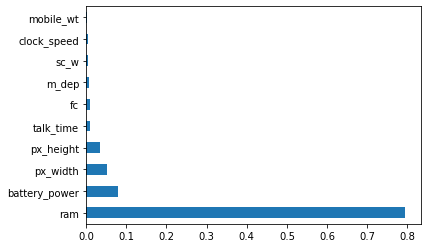

In [169]:
dt_feature = pd.Series(dt_clf.feature_importances_, index=X.columns)
dt_feature.nlargest(10).plot(kind='barh')
plt.savefig('./DTfeature.png', bbox_inches="tight")

# KNeighborsClassifier

In [172]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_train, y_train)
pred = knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('KNN 예측 정확도: {:.4f}'.format(accuracy))

KNN 예측 정확도: 0.9775


In [173]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : list(range(1, 31)),
         'weights': ['uniform', 'distance'],
         'metric': ['euclidean', 'manhattan', 'miskowski'],}

knn_clf = KNeighborsClassifier()
grid_cv = GridSearchCV(knn_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
최고 예측 정확도: 0.9819


C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.96749139 0.96749139 0.9693699  0.96749139 0.97624686 0.97687108
 0.97749647 0.97749413 0.97937147 0.98124647 0.97437186 0.97874608
 0.97999803 0.98187303 0.9762492  0.97999803 0.97749881 0.98124881
 0.97499959 0.98062342 0.97374998 0.97562498 0.97562615 0.97812654
 0.97687576 0.97875076 0.9762492  0.97875076 0.97437654 0.97687576
 0.97374998 0.97687576 0.97187615 0.97562615 0.9743742  0.97625037
 0.97562498 0.97687459 0.9743742  0.9762492  0.9762492  0.97687459
 0.97500076 0.97625037 0.97687576 0.97687576 0.97499842 0.97562498
 0.97499959 0.97625037 0.97499959 0.97562615 0.97375115 0.97500076
 0.97499959 0.97687459 0.97499959 0.97687576 0.9743742  0.97749998
 0.96749373 0.96749373 0.96499451 0.96749373 0.96999412 0.97061951
 0.96874334 0.97061834 0.97124373 0.97187029 0.9712449  0.97436951
 0.97562381 0.97562381 0.9712449  0.97499725 0.973

In [97]:
grid_cv.best_score_

0.9818730339420939

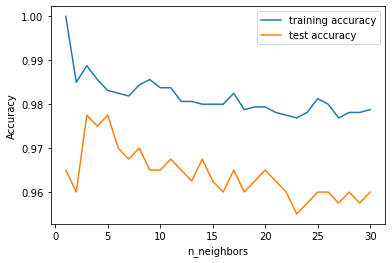

In [170]:
# from sklearn.datasets import load_breast_cancer
# cancer = load_breast_cancer()

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 31)

from sklearn.neighbors import KNeighborsClassifier
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

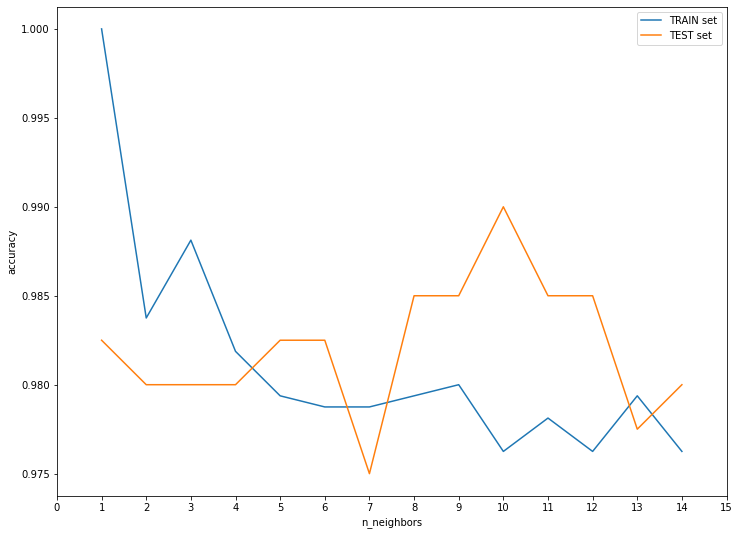

In [61]:
train_acc = []
test_acc = []
for n in range(1,15):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(X_train, y_train)
    prediction = clf.predict(X_test)
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append((prediction==y_test).mean())
    
plt.figure(figsize=(12, 9))
plt.plot(range(1, 15), train_acc, label='TRAIN set')
plt.plot(range(1, 15), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 16, step=1))
plt.legend()

In [ ]:
from sklearn.model_selection import train_test_split
# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1333)
from sklearn.model_selection import train_test_split
training_data, validation_data , training_labels, validation_labels = train_test_split(df_data, df_labels, test_size = 0.2, random_state = 100)

In [99]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [100]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [101]:
print(classifier.score(X_test, y_test))

0.9775


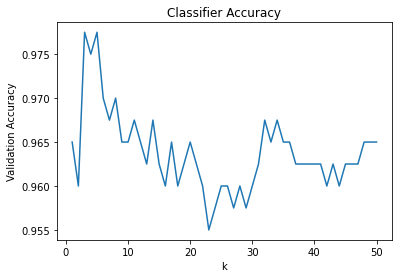

In [176]:

k_list = range(1,51)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  accuracies.append(classifier.score(X_test, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.savefig('./KNN.jpg', bbox_inches="tight")
plt.show()

# Random Forest

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1,)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)
y_pred_rf

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [196]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor(n_estimators=80, oob_score=True, max_features=7, 
                                  criterion='mse', max_depth=5, random_state=1333)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, max_features=7, n_estimators=80,
                      oob_score=True, random_state=1333)

In [184]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 예측 정확도: 0.9525


In [185]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 100],
         'max_depth': [6, 8, 10, 12],
         'min_samples_leaf': [8, 12, 18],
         'min_samples_split': [8, 16, 20]}

rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.9431


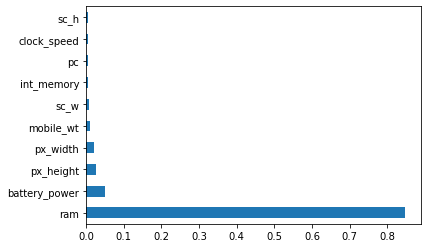

In [197]:
rfr = pd.Series(rfr.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
plt.savefig('./rffeature.jpg', bbox_inches="tight")

In [187]:
X = mobile_price_1.iloc[:,:-1]
y = mobile_price_1.iloc[:,-1]

In [91]:
X_test_rf = X_test
y_test_rf = y_pred

In [92]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(solver='lbfgs')
logistic_reg.fit(X_test_rf, y_test_rf)

LogisticRegression()

In [93]:
logistic_reg.classes_

array([0, 1], dtype=int64)

In [95]:
logistic_reg.intercept_

array([0.09491785])

In [96]:
logistic_reg.coef_

array([[ 1.66927022e-01, -1.22859191e-01,  1.18657368e-01,
         1.46845368e-02, -9.31007144e-02, -4.37225426e-02,
         1.87392386e-01, -2.19523317e-02, -1.40202314e-02,
         1.11720354e-01,  1.89575581e-01,  2.92143465e-02,
         2.39949496e-02, -2.43668402e-02, -1.39376312e-01,
        -5.29966646e-05, -9.96742451e-02,  1.11389773e-01,
        -8.94719455e-02, -2.35257270e-05]])

In [118]:
result.params

AttributeError: 'LogisticRegression' object has no attribute 'params'

In [113]:
# plot logstic function
X_new = np.linspace(X.min()-0.5, X.max()+0.5, 100).reshape(-1,1)
y_proba = logistic_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure()
plt.scatter(x=X[y==1], y=y[y==1], label='1')
plt.scatter(x=X[y==0], y=y[y==0], label='0')
#plt.scatter(x=X[pred_y==1], y=pred_y[pred_y==1], label='predicted_man')
#plt.scatter(x=X[pred_y==0], y=pred_y[pred_y==0], label='predicted_woman')
plt.plot(X_new, y_proba[:,1], color= 'r', label = 'probability line')
plt.plot([decision_boundary, decision_boundary], [0, 1], "k--", label='decision boundary')
plt.legend()
plt.xlabel("Height")
plt.ylabel("Porbability")
plt.show()

ValueError: X has 1 features per sample; expecting 20

# RF DT

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=42)

dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=42)
rfc.fit(X_train, y_train)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [63]:
print(dt_gini.score(X_test,y_test))
print(rfc.score(X_test,y_test))

0.9425
0.93


In [75]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=545.5594781168514, random_state=42)

classifier.fit(X_train,y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       189
           1       0.91      0.89      0.90       211

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


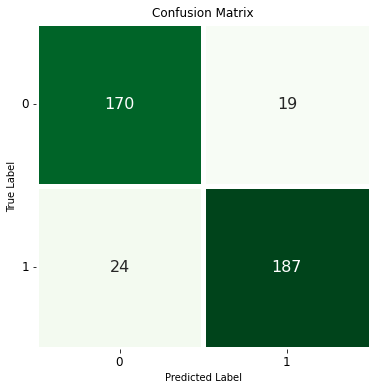

In [77]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,
            linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# 랜덤포레스트

In [111]:
from sklearn.tree import DecisionTreeClassifier

dt_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state=1333)

dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1333)

In [112]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, \
                            criterion='gini', max_depth=5, random_state=1333)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=1333)

In [113]:
print(dt_gini.score(X_test,y_test))
print(rfc.score(X_test,y_test))

0.9425
0.9275


In [114]:
print(rfc.estimators_[:3])
print(len(rfc.estimators_))

[DecisionTreeClassifier(max_depth=5, max_features='auto',
                       random_state=1286709625), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=659407721), DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=53987054)]
20


In [115]:
rfc.predict_proba(X_test)

array([[0.3899224 , 0.6100776 ],
       [0.21230549, 0.78769451],
       [0.22072776, 0.77927224],
       [0.21838287, 0.78161713],
       [0.23267476, 0.76732524],
       [0.18599302, 0.81400698],
       [0.81454309, 0.18545691],
       [0.12598699, 0.87401301],
       [0.79218489, 0.20781511],
       [0.82641064, 0.17358936],
       [0.31367919, 0.68632081],
       [0.76420743, 0.23579257],
       [0.1700174 , 0.8299826 ],
       [0.87501664, 0.12498336],
       [0.20376748, 0.79623252],
       [0.40416045, 0.59583955],
       [0.86830456, 0.13169544],
       [0.26032399, 0.73967601],
       [0.10871466, 0.89128534],
       [0.23169068, 0.76830932],
       [0.72459169, 0.27540831],
       [0.19242988, 0.80757012],
       [0.10396527, 0.89603473],
       [0.51887051, 0.48112949],
       [0.74968085, 0.25031915],
       [0.83246474, 0.16753526],
       [0.21168386, 0.78831614],
       [0.2067971 , 0.7932029 ],
       [0.7986155 , 0.2013845 ],
       [0.42972497, 0.57027503],
       [0.

In [128]:
rf_p = rfc.predict_proba(X_test)
rf_p[50][1]

0.8847273345617246

In [129]:
rf_y = []
for i in range(len(rf_p)):
    rf_y.append(rf_p[i][1])

In [130]:
rf_y

[0.6100776018066156,
 0.7876945110667471,
 0.7792722405978413,
 0.7816171326901256,
 0.7673252392831578,
 0.8140069771738248,
 0.18545691168088768,
 0.8740130104486022,
 0.20781511105431374,
 0.17358935725312655,
 0.6863208052063527,
 0.23579257179903443,
 0.8299825963396398,
 0.1249833609801746,
 0.796232518061572,
 0.5958395526819801,
 0.1316954382096797,
 0.7396760096978571,
 0.891285344016592,
 0.768309318788298,
 0.27540831312647074,
 0.8075701162271247,
 0.8960347253386999,
 0.4811294887328324,
 0.25031915299517093,
 0.16753526340894823,
 0.7883161416763205,
 0.7932028991283192,
 0.20138449537072667,
 0.5702750275449728,
 0.13658761534137254,
 0.16375665883028673,
 0.13945170615408461,
 0.7390067869062145,
 0.7373238057145763,
 0.812375110860805,
 0.7807357264365689,
 0.11575113837357746,
 0.33513057022048165,
 0.3093889670963715,
 0.6260939917317432,
 0.7640845247277467,
 0.9092297830281026,
 0.7871907416001865,
 0.13895694019937904,
 0.7984940758200365,
 0.1467850729305568,
 0.

In [139]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, 
                            criterion='gini', max_depth=5, random_state=1334)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=1334)

In [141]:
rfc.predict_proba(X_test)

array([[0.41135719, 0.58864281],
       [0.15566483, 0.84433517],
       [0.18995963, 0.81004037],
       [0.13837059, 0.86162941],
       [0.17997348, 0.82002652],
       [0.13768863, 0.86231137],
       [0.89960607, 0.10039393],
       [0.17822174, 0.82177826],
       [0.84756205, 0.15243795],
       [0.86447453, 0.13552547],
       [0.34389345, 0.65610655],
       [0.78517859, 0.21482141],
       [0.0829823 , 0.9170177 ],
       [0.86512738, 0.13487262],
       [0.19424109, 0.80575891],
       [0.38443954, 0.61556046],
       [0.90987374, 0.09012626],
       [0.15424212, 0.84575788],
       [0.11195415, 0.88804585],
       [0.19937112, 0.80062888],
       [0.64517237, 0.35482763],
       [0.27459318, 0.72540682],
       [0.11313316, 0.88686684],
       [0.71400231, 0.28599769],
       [0.73102473, 0.26897527],
       [0.90421859, 0.09578141],
       [0.16642765, 0.83357235],
       [0.18620412, 0.81379588],
       [0.90886842, 0.09113158],
       [0.57304298, 0.42695702],
       [0.

In [142]:
rf_p = rfc.predict_proba(X_test)

In [143]:
for i in range(len(rf_p)):
    rf_y.append(rf_p[i][1])

In [145]:
len(rf_y)

800

In [146]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, 
                            criterion='gini', max_depth=5, random_state=1335)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=1335)

In [147]:
rfc.predict_proba(X_test)

array([[0.51547627, 0.48452373],
       [0.16410355, 0.83589645],
       [0.15929716, 0.84070284],
       [0.11677634, 0.88322366],
       [0.19595705, 0.80404295],
       [0.24379156, 0.75620844],
       [0.86081886, 0.13918114],
       [0.15601504, 0.84398496],
       [0.84037923, 0.15962077],
       [0.91691218, 0.08308782],
       [0.24158824, 0.75841176],
       [0.86046005, 0.13953995],
       [0.16486741, 0.83513259],
       [0.88137656, 0.11862344],
       [0.09590177, 0.90409823],
       [0.34188924, 0.65811076],
       [0.84675783, 0.15324217],
       [0.17587453, 0.82412547],
       [0.18691494, 0.81308506],
       [0.12998317, 0.87001683],
       [0.6820326 , 0.3179674 ],
       [0.11507608, 0.88492392],
       [0.1125655 , 0.8874345 ],
       [0.69070936, 0.30929064],
       [0.76545604, 0.23454396],
       [0.88392606, 0.11607394],
       [0.11655116, 0.88344884],
       [0.1495212 , 0.8504788 ],
       [0.84690954, 0.15309046],
       [0.32582232, 0.67417768],
       [0.

In [148]:
rf_p = rfc.predict_proba(X_test)

In [149]:
for i in range(len(rf_p)):
    rf_y.append(rf_p[i][1])

In [150]:
len(rf_y)

1200

In [151]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, oob_score=True, 
                            criterion='gini', max_depth=5, random_state=1336)
rfc.fit(X_train, y_train)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=1336)

In [152]:
rfc.predict_proba(X_test)

array([[0.47865253, 0.52134747],
       [0.15007873, 0.84992127],
       [0.20925979, 0.79074021],
       [0.09633789, 0.90366211],
       [0.23275821, 0.76724179],
       [0.25098086, 0.74901914],
       [0.81769747, 0.18230253],
       [0.12526598, 0.87473402],
       [0.84508246, 0.15491754],
       [0.82428381, 0.17571619],
       [0.32933322, 0.67066678],
       [0.79950184, 0.20049816],
       [0.14061672, 0.85938328],
       [0.85957853, 0.14042147],
       [0.25287408, 0.74712592],
       [0.37493947, 0.62506053],
       [0.88307738, 0.11692262],
       [0.27106064, 0.72893936],
       [0.07795865, 0.92204135],
       [0.18996542, 0.81003458],
       [0.77019999, 0.22980001],
       [0.17227406, 0.82772594],
       [0.17647908, 0.82352092],
       [0.69652287, 0.30347713],
       [0.70621188, 0.29378812],
       [0.84404684, 0.15595316],
       [0.17713519, 0.82286481],
       [0.26483982, 0.73516018],
       [0.88777099, 0.11222901],
       [0.34655206, 0.65344794],
       [0.

In [153]:
rf_p = rfc.predict_proba(X_test)

In [154]:
for i in range(len(rf_p)):
    rf_y.append(rf_p[i][1])

In [155]:
len(rf_y)

1600

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [133]:
# fit regression model
reg_tree = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=1333) # criterion default : mse
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=1333)

In [134]:
# export rules of the decision tree
features = X.columns.tolist()
print(tree.export_text(reg_tree, feature_names=features))

|--- ram <= 2235.50
|   |--- ram <= 1599.50
|   |   |--- value: [0.01]
|   |--- ram >  1599.50
|   |   |--- value: [0.28]
|--- ram >  2235.50
|   |--- ram <= 2458.50
|   |   |--- value: [0.69]
|   |--- ram >  2458.50
|   |   |--- value: [0.98]



In [198]:
print(max(mobile_price_1['ram']))

3998


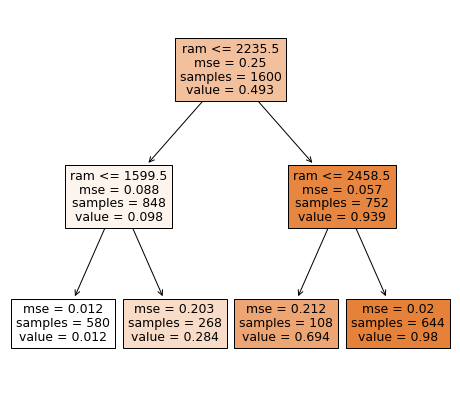

In [135]:
plt.figure(figsize=(8,7))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()

In [156]:
# fit regression model
reg_tree = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=123) # criterion default : mse
reg_tree.fit(X_train,rf_y)

DecisionTreeRegressor(max_depth=2, random_state=123)

In [157]:
# export rules of the decision tree
features = X.columns.tolist()
print(tree.export_text(reg_tree, feature_names=features))

|--- px_width <= 1932.00
|   |--- sc_w <= 6.50
|   |   |--- value: [0.53]
|   |--- sc_w >  6.50
|   |   |--- value: [0.49]
|--- px_width >  1932.00
|   |--- sc_w <= 14.50
|   |   |--- value: [0.37]
|   |--- sc_w >  14.50
|   |   |--- value: [0.85]



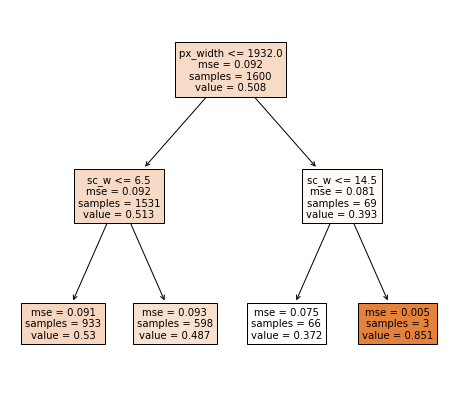

In [158]:
plt.figure(figsize=(8,7))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()

In [159]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [ ]:
X = mobile_price_1.drop(columns=['price_range'])
y = mobile_price_1['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1333)

X=mobile_price_1.drop('price_range',axis=1)  
Y=mobile_price_1['price_range']

# train test splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20, random_state=1333)

In [161]:
len(rf_y)

1600

In [163]:
# RMSE, MSE, R-squared
RMSE = [mean_squared_error(y, reg_tree.predict(X), squared=False),
       mean_squared_error(y_test, reg_tree.predict(X_test), squared=False)]
MAPE = [mean_absolute_percentage_error(y, reg_tree.predict(X)),
        mean_absolute_percentage_error(y_test, reg_tree.predict(X_test))]
r2 = [r2_score(y, reg_tree.predict(X)), 
      r2_score(y_test, reg_tree.predict(X_test))]

performance_summary = pd.DataFrame({
'Dataset': ['Training', 'Test'],
'RMSE': RMSE,
'MAPE': MAPE,
'R^2': r2
})
performance_summary.round(4)

,Dataset,RMSE,MAPE,R^2
0,Training,0.5031,1.145939e+15,-0.0125
1,Test,0.5048,1.081357e+15,-0.0223


#  RAM 제외

In [215]:
X_1=mobile_price_1.drop('price_range',axis=1)  
X_1=X_1.drop('ram',axis=1) 
Y_1=mobile_price_1['price_range']

# train test splitting
from sklearn.model_selection import train_test_split
X_1_train,X_1_test,y_1_train,y_1_test=train_test_split(X_1,Y_1,test_size=0.20, random_state=1333)

In [212]:
X_1

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,18,10,19,1,1,1


In [213]:
Y_1

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64

In [14]:
reg_tree = DecisionTreeRegressor(criterion="mse", max_depth=2, random_state=1333) # criterion default : mse
reg_tree.fit(X_1_train,y_1_train)

DecisionTreeRegressor(max_depth=2, random_state=1333)

In [17]:
features = X_1.columns.tolist()
print(tree.export_text(reg_tree, feature_names=features))

|--- battery_power <= 1478.50
|   |--- px_height <= 1133.00
|   |   |--- value: [0.40]
|   |--- px_height >  1133.00
|   |   |--- value: [0.58]
|--- battery_power >  1478.50
|   |--- mobile_wt <= 190.50
|   |   |--- value: [0.62]
|   |--- mobile_wt >  190.50
|   |   |--- value: [0.43]



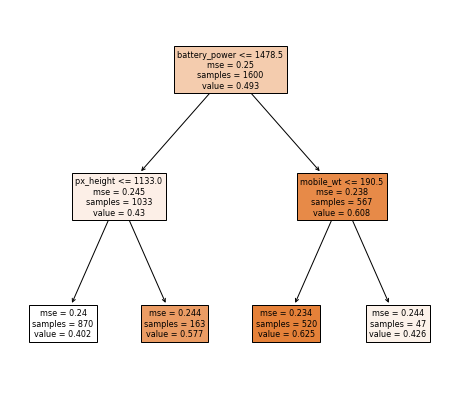

In [18]:
plt.figure(figsize=(8,7))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
plt.show()

In [222]:
rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1,)
rf_clf.fit(X_1_train,y_1_train)
y_pred_rf=rf_clf.predict(X_1_test)
y_pred_rf

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [223]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1)
rf_clf.fit(X_1_train,y_1_train)
pred = rf_clf.predict(X_1_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 예측 정확도: 0.5525


In [224]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators' : [10, 100],
         'max_depth': [6, 8, 10, 12],
         'min_samples_leaf': [8, 12, 18],
         'min_samples_split': [8, 16, 20]}

rf_clf = RandomForestClassifier(random_state=1333, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_1_train,y_1_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 18, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.5806


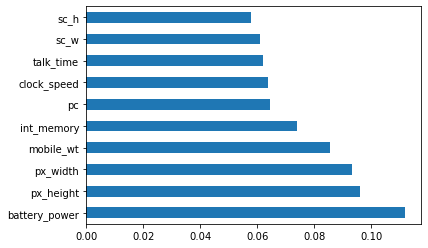

In [230]:
rf_clf.fit(X_1_train,y_1_train)
rf_feature = pd.Series(rf_clf.feature_importances_, index=X_1.columns)
rf_feature.nlargest(10).plot(kind='barh')
plt.savefig('./delramrf.jpg', bbox_inches="tight")

In [233]:
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_1_train,y_1_train)
pred = knn_clf.predict(X_1_test)
accuracy = accuracy_score(y_1_test, pred)
print('KNN 예측 정확도: {:.4f}'.format(accuracy))

KNN 예측 정확도: 0.5125


In [232]:
params = {'n_neighbors' : list(range(1, 31)),
         'weights': ['uniform', 'distance'],
         'metric': ['euclidean', 'manhattan', 'miskowski'],}

knn_clf = KNeighborsClassifier()
grid_cv = GridSearchCV(knn_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_1_train,y_1_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'uniform'}
최고 예측 정확도: 0.5762


C:\Users\JI-HYEON\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.51562423 0.51562423 0.52374494 0.51562423 0.52873636 0.53623988
 0.54186957 0.53436839 0.54624145 0.53936918 0.55124692 0.54811411
 0.54436645 0.53749534 0.55249184 0.55124106 0.55124223 0.55249419
 0.55374145 0.54937192 0.54748754 0.53749652 0.55374145 0.53936449
 0.55686372 0.55436684 0.56748717 0.56373717 0.57123483 0.56686295
 0.56373951 0.55998716 0.56373248 0.56560866 0.56560631 0.56810436
 0.55811099 0.56310943 0.55873638 0.55810982 0.56123677 0.565611
 0.56810905 0.56060553 0.55686958 0.56498912 0.57061881 0.56311646
 0.56624342 0.57248913 0.56374185 0.56186802 0.56061373 0.5643649
 0.55311489 0.56186919 0.56499966 0.56186919 0.56249224 0.56061841
 0.52312541 0.52312541 0.51249376 0.52312541 0.54062347 0.5437516
 0.53750003 0.5406223  0.54250316 0.53875315 0.55500043 0.55125394
 0.56123912 0.55561528 0.55999419 0.55811451 0.5618551

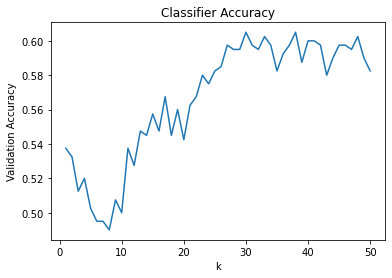

In [235]:
k_list = range(1,51)
accuracies = []

for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_1_train,y_1_train)
  accuracies.append(classifier.score(X_1_test, y_1_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Classifier Accuracy")
plt.savefig('./delRamKNN.jpg', bbox_inches="tight")
plt.show()

In [236]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_1_train,y_1_train)
pred = dt_clf.predict(X_1_test)
accuracy = accuracy_score(y_1_test, pred)
print('DecisionTreeClassifier: {:.4f}'.format(accuracy))

DecisionTreeClassifier: 0.5275


In [238]:
params = {'max_depth' : range(2, 20, 1),
         'min_samples_split': range(2, 100, 10),
         'criterion': ['gini', 'entropy'],}

grid_cv = GridSearchCV(DecisionTreeClassifier(), params, n_jobs=-1)
grid_cv.fit(X_1_train,y_1_train)
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 2}
최고 예측 정확도: 0.5844


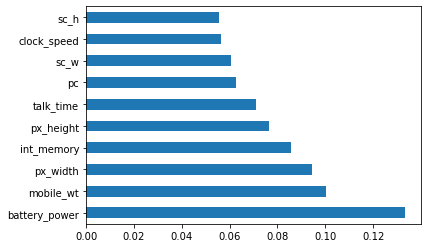

In [241]:
dt_feature = pd.Series(dt_clf.feature_importances_, index=X_1.columns)

dt_feature.nlargest(10).plot(kind='barh')
plt.savefig('./delRamDT.jpg', bbox_inches="tight")

In [10]:
mobile_price_2 = mobile_price_1.drop('ram',axis=1) 

In [11]:
mobile_price_2

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,18,10,19,1,1,1,0


In [12]:
X_1=mobile_price_2.drop('price_range',axis=1) 
Y_1=mobile_price_2['price_range']

# train test splitting
from sklearn.model_selection import train_test_split
X_1_train,X_1_test,y_1_train,y_1_test=train_test_split(X_1,Y_1,test_size=0.20, random_state=1333)

In [245]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = mobile_price_2.copy()
target_name = 'price_range' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_1_train.index, X_1_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [251]:
min_sample_ratio = 0.01
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 100 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9)

C:\Users\JI-HYEON\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [252]:
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\Users\JI-HYEON\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.5375, 0.5373)

In [253]:
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[112  77]
 [108 103]]


In [254]:
cri.export_text()

IF ['sc_w >= 15.5'] THEN price_range = 1   (homogeneity = 0.6667 , coverage = 0.0262 )
IF ['mobile_wt < 83.5'] THEN price_range = 0   (homogeneity = 0.6735 , coverage = 0.0306 )
IF ['battery_power < 530.5'] THEN price_range = 0   (homogeneity = 0.6944 , coverage = 0.0225 )
IF ['battery_power < 569.5'] THEN price_range = 0   (homogeneity = 0.7 , coverage = 0.05 )
IF ['px_width < 531.5'] THEN price_range = 0   (homogeneity = 0.6216 , coverage = 0.0231 )
IF ['int_memory >= 63.5'] THEN price_range = 1   (homogeneity = 0.6154 , coverage = 0.0162 )
IF ['battery_power >= 1981.5'] THEN price_range = 1   (homogeneity = 0.6 , coverage = 0.0156 )
IF ['sc_w >= 14.5'] THEN price_range = 0   (homogeneity = 0.6212 , coverage = 0.0412 )
IF ['px_width >= 1975.5'] THEN price_range = 1   (homogeneity = 0.5926 , coverage = 0.0169 )
IF ['sc_w >= 13.5'] THEN price_range = 1   (homogeneity = 0.6064 , coverage = 0.0588 )
IF ['sc_w < 15.5', 'battery_power < 1183.0', 'battery_power >= 1152.5'] THEN price_range 

In [ ]:
IF ['sc_w >= 15.5'] THEN price_range = 1   (homogeneity = 0.6667 , coverage = 0.0262 )
IF ['mobile_wt < 83.5'] THEN price_range = 0   (homogeneity = 0.6735 , coverage = 0.0306 )
IF ['battery_power < 530.5'] THEN price_range = 0   (homogeneity = 0.6944 , coverage = 0.0225 )
IF ['battery_power < 569.5'] THEN price_range = 0   (homogeneity = 0.7 , coverage = 0.05 )
IF ['px_width < 531.5'] THEN price_range = 0   (homogeneity = 0.6216 , coverage = 0.0231 )
IF ['int_memory >= 63.5'] THEN price_range = 1   (homogeneity = 0.6154 , coverage = 0.0162 )
IF ['battery_power >= 1981.5'] THEN price_range = 1   (homogeneity = 0.6 , coverage = 0.0156 )
IF ['sc_w >= 14.5'] THEN price_range = 0   (homogeneity = 0.6212 , coverage = 0.0412 )
IF ['px_width >= 1975.5'] THEN price_range = 1   (homogeneity = 0.5926 , coverage = 0.0169 )
IF ['sc_w >= 13.5'] THEN price_range = 1   (homogeneity = 0.6064 , coverage = 0.0588 )
IF ['sc_w < 15.5', 'battery_power < 1183.0', 'battery_power >= 1152.5'] THEN price_range = 0   (homogeneity = 0.6389 , coverage = 0.0225 )
IF ['px_width >= 1945.5'] THEN price_range = 0   (homogeneity = 0.5345 , coverage = 0.0362 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width >= 1916.5'] THEN price_range = 1   (homogeneity = 0.6429 , coverage = 0.0156 )
IF ['fc >= 13.5'] THEN price_range = 1   (homogeneity = 0.5652 , coverage = 0.0431 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc >= 12.5'] THEN price_range = 0   (homogeneity = 0.7727 , coverage = 0.0319 )
IF ['fc >= 11.5'] THEN price_range = 1   (homogeneity = 0.5 , coverage = 0.085 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc >= 10.5'] THEN price_range = 1   (homogeneity = 0.6038 , coverage = 0.0331 )
IF ['sc_w >= 12.5'] THEN price_range = 0   (homogeneity = 0.5769 , coverage = 0.0812 )
IF ['battery_power < 586.5'] THEN price_range = 1   (homogeneity = 0.6337 , coverage = 0.0631 )
IF ['int_memory >= 61.5'] THEN price_range = 0   (homogeneity = 0.5385 , coverage = 0.0406 )
IF ['mobile_wt >= 198.5'] THEN price_range = 1   (homogeneity = 0.5714 , coverage = 0.0219 )
IF ['m_dep >= 0.95'] THEN price_range = 0   (homogeneity = 0.5488 , coverage = 0.0512 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'talk_time < 2.5'] THEN price_range = 0   (homogeneity = 0.5556 , coverage = 0.0394 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'int_memory >= 59.5'] THEN price_range = 1   (homogeneity = 0.6 , coverage = 0.0188 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'px_height < 40.0'] THEN price_range = 0   (homogeneity = 0.6154 , coverage = 0.0162 )
IF ['mobile_wt >= 194.5'] THEN price_range = 0   (homogeneity = 0.5556 , coverage = 0.0562 )
IF ['mobile_wt < 85.5'] THEN price_range = 1   (homogeneity = 0.5676 , coverage = 0.0462 )
IF ['battery_power >= 1938.0'] THEN price_range = 1   (homogeneity = 0.557 , coverage = 0.0494 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'px_height < 62.5'] THEN price_range = 1   (homogeneity = 0.5472 , coverage = 0.0331 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height < 89.0'] THEN price_range = 0   (homogeneity = 0.9412 , coverage = 0.0106 )
IF ['px_width < 620.5'] THEN price_range = 0   (homogeneity = 0.5897 , coverage = 0.0731 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'talk_time < 3.5'] THEN price_range = 1   (homogeneity = 0.5676 , coverage = 0.0231 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'talk_time < 4.5'] THEN price_range = 0   (homogeneity = 0.5802 , coverage = 0.1013 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'sc_h >= 18.5'] THEN price_range = 1   (homogeneity = 0.55 , coverage = 0.0375 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'battery_power < 626.0'] THEN price_range = 1   (homogeneity = 0.5942 , coverage = 0.0431 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width >= 1805.5'] THEN price_range = 1   (homogeneity = 0.5849 , coverage = 0.0662 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'battery_power >= 1801.5'] THEN price_range = 1   (homogeneity = 0.6706 , coverage = 0.0531 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'm_dep >= 0.8500000000000001'] THEN price_range = 0   (homogeneity = 0.5915 , coverage = 0.0444 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'sc_h < 5.5'] THEN price_range = 0   (homogeneity = 0.5467 , coverage = 0.0469 )
IF ['px_width < 680.0'] THEN price_range = 1   (homogeneity = 0.5508 , coverage = 0.1169 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'battery_power >= 1664.5', 'n_cores >= 5.5'] THEN price_range = 1   (homogeneity = 0.8235 , coverage = 0.0106 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'sc_h >= 16.5'] THEN price_range = 1   (homogeneity = 0.5253 , coverage = 0.1356 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'sc_h >= 5.5', 'px_width >= 680.0', 'battery_power < 1664.5', 'n_cores < 5.5', 'sc_h < 16.5', 'sc_h >= 15.5'] THEN price_range = 0   (homogeneity = 0.6667 , coverage = 0.0294 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'sc_h >= 5.5', 'px_width >= 680.0', 'talk_time >= 19.5'] THEN price_range = 0   (homogeneity = 0.6364 , coverage = 0.0138 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'sc_h >= 5.5', 'px_width >= 680.0', 'battery_power < 1664.5', 'n_cores < 5.5', 'battery_power >= 1583.5'] THEN price_range = 0   (homogeneity = 0.6 , coverage = 0.025 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'sc_h >= 5.5', 'px_width >= 680.0', 'sc_w >= 10.5'] THEN price_range = 1   (homogeneity = 0.6216 , coverage = 0.0231 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'px_height >= 1166.0'] THEN price_range = 1   (homogeneity = 0.6034 , coverage = 0.0725 )
IF ['sc_w < 15.5', 'mobile_wt >= 83.5', 'battery_power >= 530.5', 'battery_power >= 569.5', 'px_width >= 531.5', 'int_memory < 63.5', 'battery_power < 1981.5', 'sc_w < 14.5', 'px_width < 1975.5', 'sc_w < 13.5', 'battery_power >= 1183.0', 'battery_power < 1152.5', 'px_width < 1945.5', 'px_width < 1916.5', 'fc < 13.5', 'fc < 12.5', 'fc < 11.5', 'fc < 10.5', 'sc_w < 12.5', 'battery_power >= 586.5', 'int_memory < 61.5', 'mobile_wt < 198.5', 'm_dep < 0.95', 'talk_time >= 2.5', 'int_memory < 59.5', 'px_height >= 40.0', 'mobile_wt < 194.5', 'mobile_wt >= 85.5', 'battery_power < 1938.0', 'px_height >= 62.5', 'px_height >= 89.0', 'px_width >= 620.5', 'talk_time >= 3.5', 'talk_time >= 4.5', 'sc_h < 18.5', 'battery_power >= 626.0', 'px_width < 1805.5', 'battery_power < 1801.5', 'm_dep < 0.8500000000000001', 'sc_h >= 5.5', 'px_width >= 680.0', 'battery_power < 1664.5', 'n_cores < 5.5', 'int_memory < 10.5'] THEN price_range = 0   (homogeneity = 0.566 , coverage = 0.0331 )

In [255]:
cri.df_concise_rule

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Rule,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...","sc_w < 15.5, mobile_wt >= 83.5, battery_power ...","sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",battery_power < 569.5,battery_power < 530.5,mobile_wt < 83.5,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",sc_w >= 15.5,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...","sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",...,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",px_width < 680.0,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",m_dep >= 0.95,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...","sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",int_memory >= 61.5,px_width >= 1945.5,"sc_w < 15.5, mobile_wt >= 83.5, battery_power ...",fc >= 11.5
pred_y,0,1,0,0,0,0,1,1,0,1,...,0,1,1,0,1,0,0,0,1,1
Homogeneity,0.9412,0.8235,0.7727,0.7,0.6944,0.6735,0.6706,0.6667,0.6667,0.6429,...,0.5556,0.5508,0.55,0.5488,0.5472,0.5467,0.5385,0.5345,0.5253,0.5
Coverage,0.0106,0.0106,0.0319,0.05,0.0225,0.0306,0.0531,0.0262,0.0294,0.0156,...,0.0394,0.1169,0.0375,0.0512,0.0331,0.0469,0.0406,0.0362,0.1356,0.085
# of condition,31.0,41.0,16.0,1.0,1.0,1.0,30.0,1.0,45.0,14.0,...,11.0,1.0,13.0,1.0,8.0,6.0,1.0,1.0,13.0,1.0
